## **Libraries import for the EDA**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

## **Function to evaluate the data available in a DataFrame**

In [44]:
def columnsDataAvailable(df,perc):
    ''' Creating a Function to evaluate the percentage of data available for each columns and filtering by a chosen % (data deleted under it) which data are kept.
    A bar graph with data kept and their % available would be shown. Data should be a DataFrame and Perc a floating number. It returns a DataFrame filtered.
    Keep in mind that a row is add in the dataSet! The function can only take columns type str!!! It also evaluates the first and last columns with data'''
    valueslast = df.apply(pd.Series.last_valid_index,axis=1)
    valuesfirst = df.apply(pd.Series.first_valid_index,axis = 1)

    list_first = [df.columns.get_loc(f) for f in valuesfirst]
    list_last = [df.columns.get_loc(l)for l in valueslast]

    firstcolumns_loc =min(list_first)
    lastcolumns_loc = max(list_last)

    print('columns with first values is {} and columns with last value is {}'.format(df.columns[firstcolumns_loc],df.columns[lastcolumns_loc]))
    
    dataSum = 0
    newData = df.iloc[:,firstcolumns_loc:(lastcolumns_loc+1)]
    percASeries = pd.Series(name='AvailableData %',dtype = float)
    
    for i in newData.columns:
        dataSum+=newData[i].notna().sum()
        percAvailable = (((newData[i].notna().sum())/newData.shape[0])*100)
        if percAvailable < perc:
            newData = newData.drop(i,axis=1)
        else:
            percASeries[i] = percAvailable
           
        dataSumPerc = (dataSum/(newData.shape[0]*newData.shape[1]))*100
       
    print('There is {} percent of values available in the Dataframe, available data above {} percent have been kept'.format(dataSumPerc,perc))
        
        # Bar Graph with the kept data and their percentage
    if int(newData.shape[1]/2) > 20:
        figure1 = plt.figure(figsize =(18,6))
    else:
        figure1 = plt.figure(figsize =(int(newData.shape[1]/2),6))
        
    ax = percASeries.plot(kind='bar',ylabel='Pourcentage %')
    plt.title('Données disponibles')
    # Loop to show labels above the bars
    for x,y in zip(range(0,len(percASeries.index)),percASeries.values):
        ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 7)
    plt.savefig('Données disponibles.png',dpi=300, bbox_inches = 'tight')
    plt.show()

    return newData

## **Evaluate the data retrieve on the seattle site**

### Taking basic informations on the CSV files

In [45]:
df_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [46]:
df_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [47]:
df_2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


columns with first values is OSEBuildingID and columns with last value is Zip Codes
There is 83.11122435979105 percent of values available in the Dataframe, available data above 0 percent have been kept


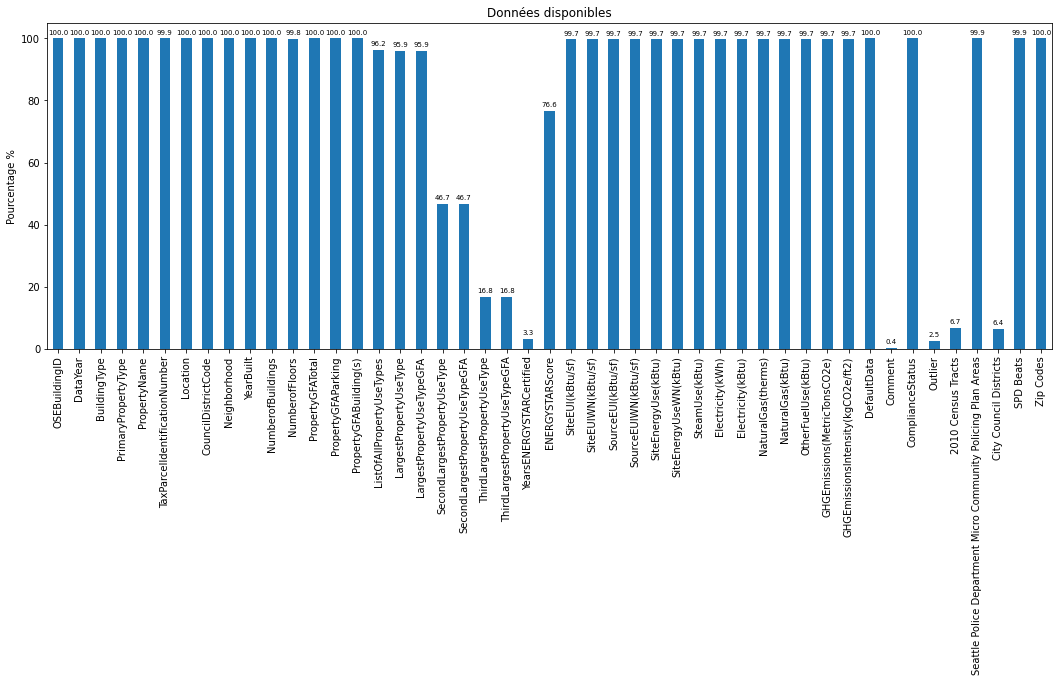

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,...,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,...,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,...,1.89,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,"{'latitude': '47.68396954', 'longitude': '-122...",4,NORTHEAST,1981,...,0.04,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792


In [48]:
columnsDataAvailable(df_2015,0)

In [50]:
df_2016.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


columns with first values is OSEBuildingID and columns with last value is GHGEmissionsIntensity
There is 87.15227694209767 percent of values available in the Dataframe, available data above 0 percent have been kept


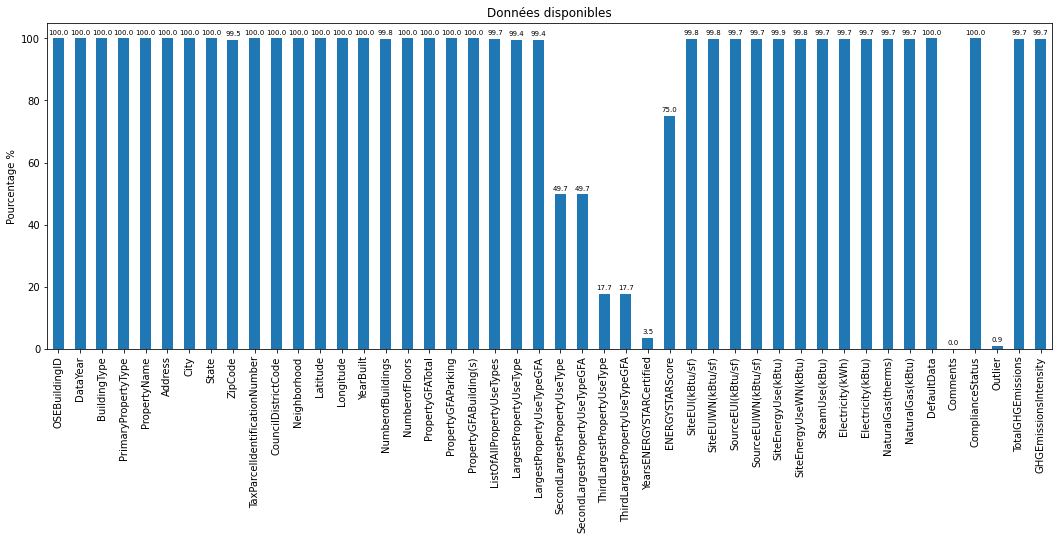

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [51]:
columnsDataAvailable(df_2016,0)

### --> We decided to use the file from 2016, there are more observations and there are more recent

let's try to see if there is duplicates values in our building

In [52]:
df_2016.duplicated(subset = 'OSEBuildingID').sum()

0

--> all building ID seems different

## **Exploratory Data Analysis on 2016 file: Our problematic is to create models for the prediction of CO2 emissions and the total energy consumption of non residential building and evaluate the interest of the ENRGYSTARScore on the emissions**

In [53]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### There is 46 variables in our dataset:
- 15 qualitatives
- 31 quantitatives




### **Qualitative variables exploration**

In [54]:
df_2016_quali = df_2016.select_dtypes(include = ['object'])

In [55]:
df_2016_quali

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,ComplianceStatus,Outlier
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,Compliant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,1624049080,GREATER DUWAMISH,Office,Office,NaN,NaN,NaN,Error - Correct Default Data,NaN
3372,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,3558300000,DOWNTOWN,Other - Recreation,Other - Recreation,NaN,NaN,NaN,Compliant,NaN
3373,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,1794501150,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,NaN,Compliant,NaN
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,7883603155,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,NaN,Compliant,NaN


In [56]:
df_2016_quali.describe()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,ComplianceStatus,Outlier
count,3376,3376,3376,3376,3376,3376,3376,3376,3367,3356,1679,596,119,3376,32
unique,8,24,3362,3354,1,1,3268,19,466,56,50,44,65,4,2
top,NonResidential,Low-Rise Multifamily,Northgate Plaza,309 South Cloverdale Street,Seattle,WA,1625049001,DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store,2016,Compliant,Low outlier
freq,1460,987,3,4,3376,3376,8,573,866,1667,976,110,14,3211,23


--> On a first look we can underline a few categories:
- Building type and use
- Geographical informations
- Other informations related to energy survey 

--> Some variables have to few informations we will not keep them: 'SecondLargestPropertyUseType','ThirdLargestPropertyUseType', 'outlier' and 'YearsENERGYSTARCertified'



--> By taking more informations regarding variables we decide to not take few others into account: 'Property Name','City', 'State' and 'TaxParcelIdentificationNumber','compliance_status'

--> Let's visualize the ones with only a few unique categories

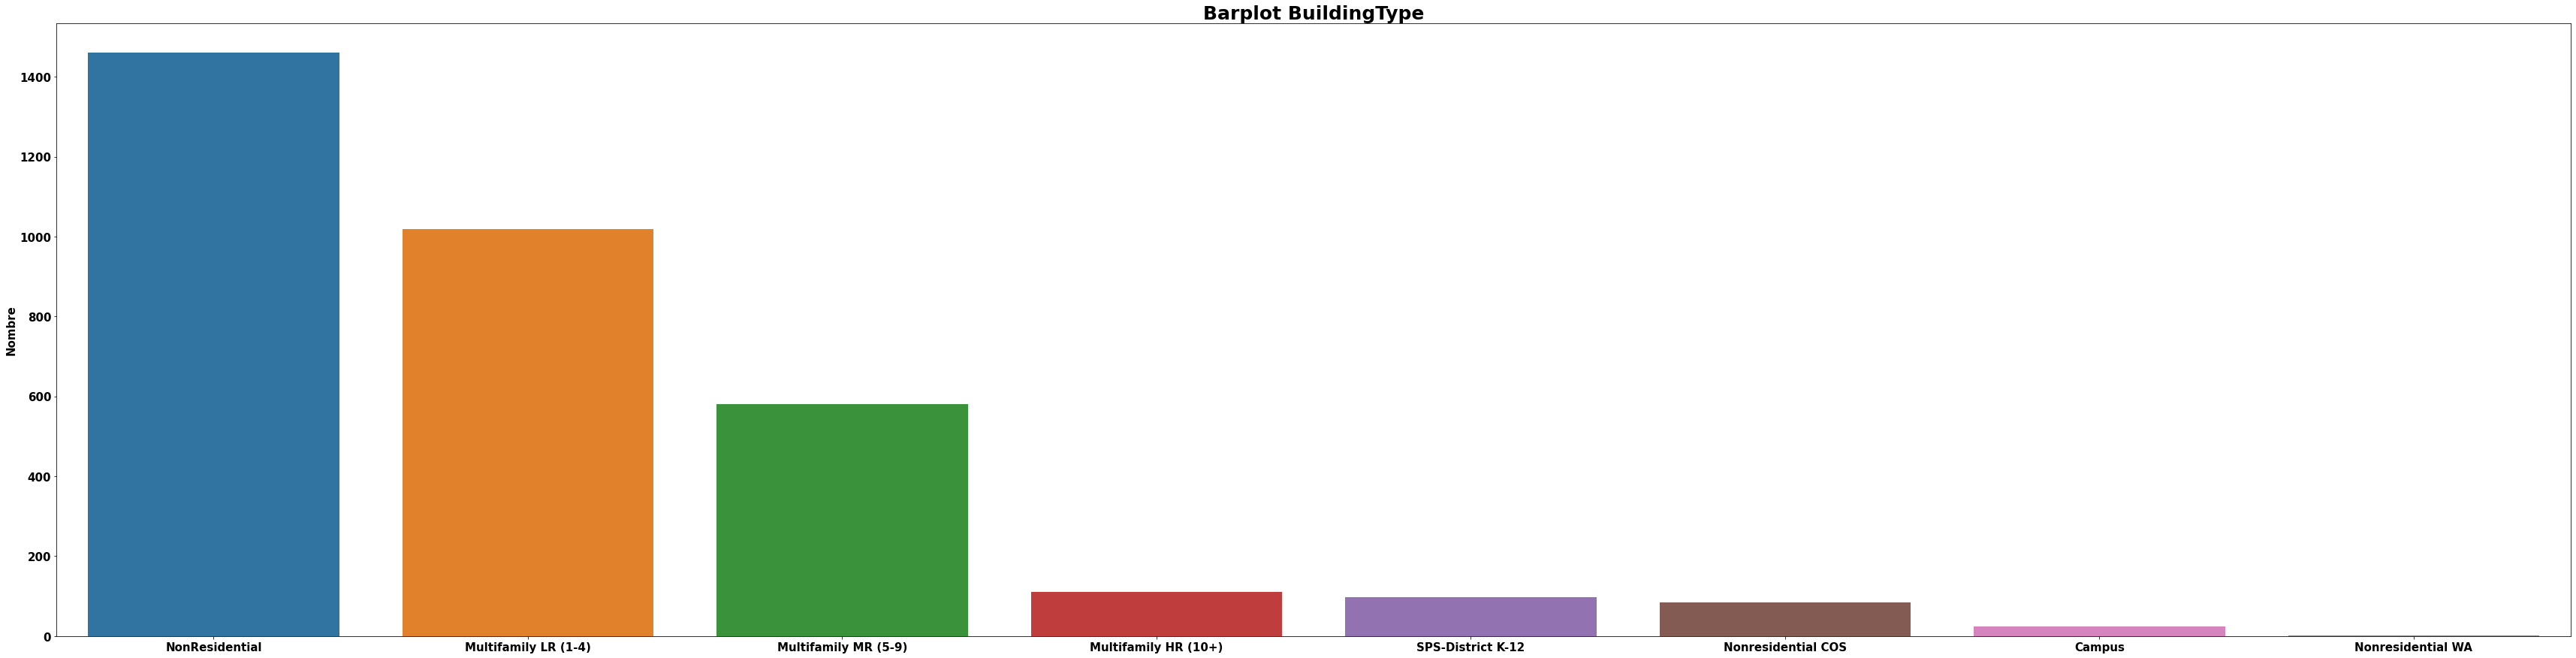

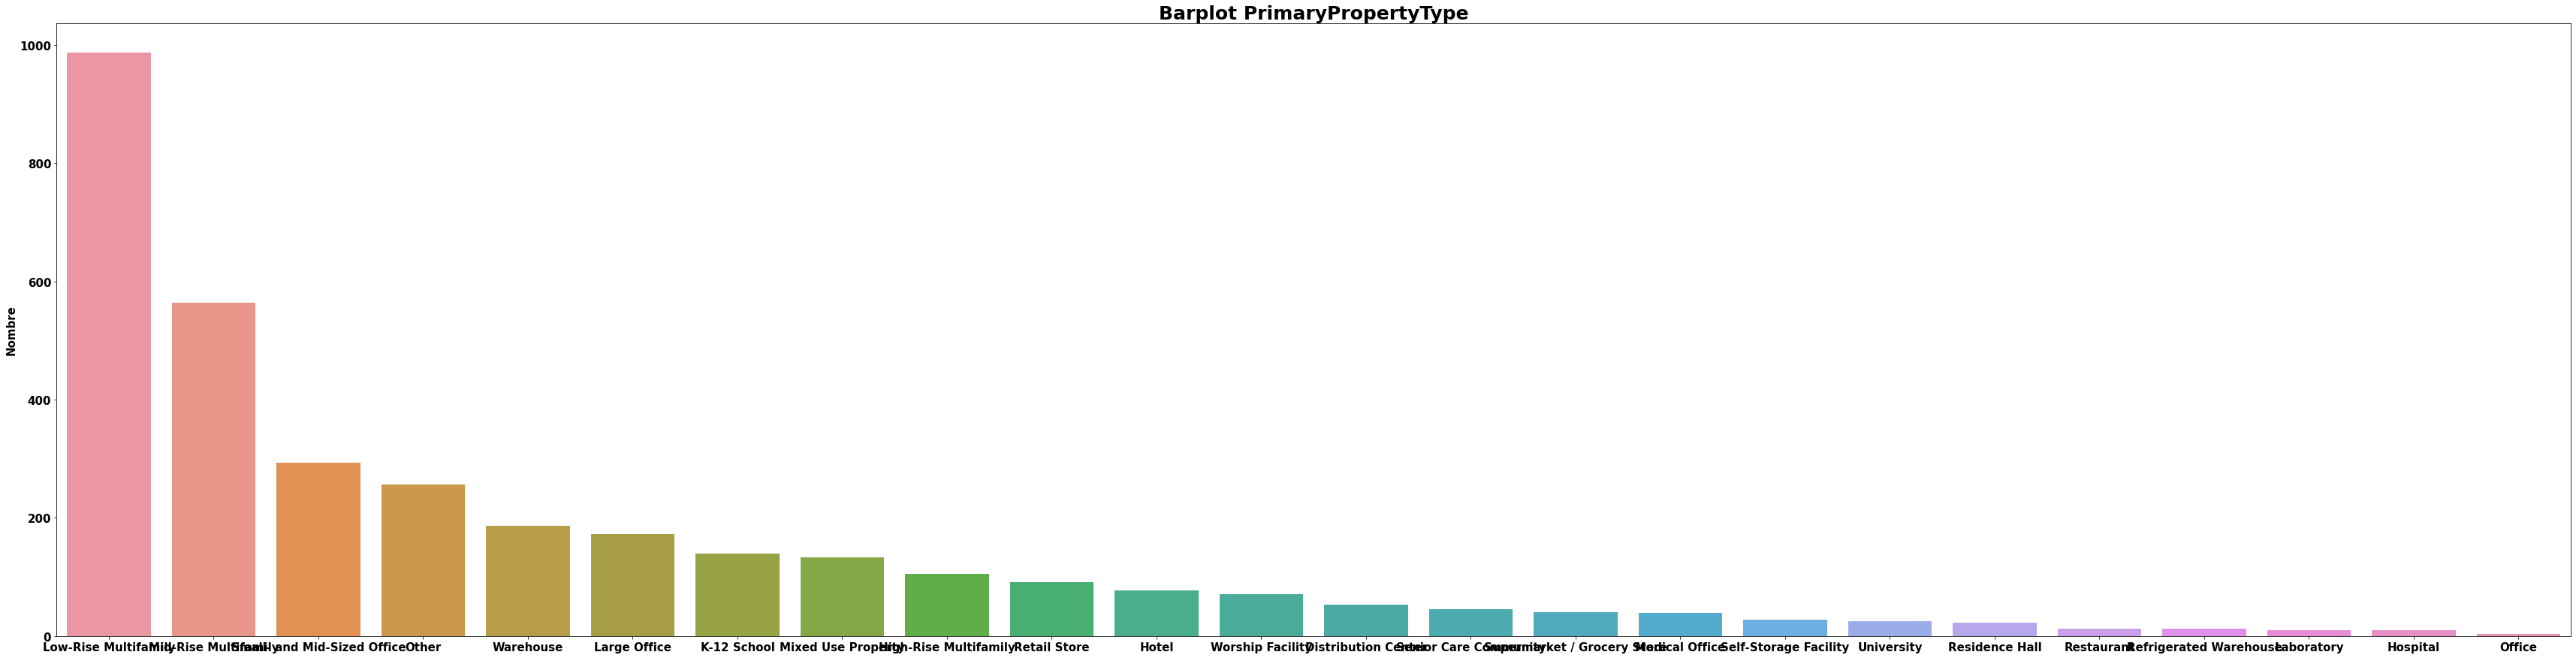

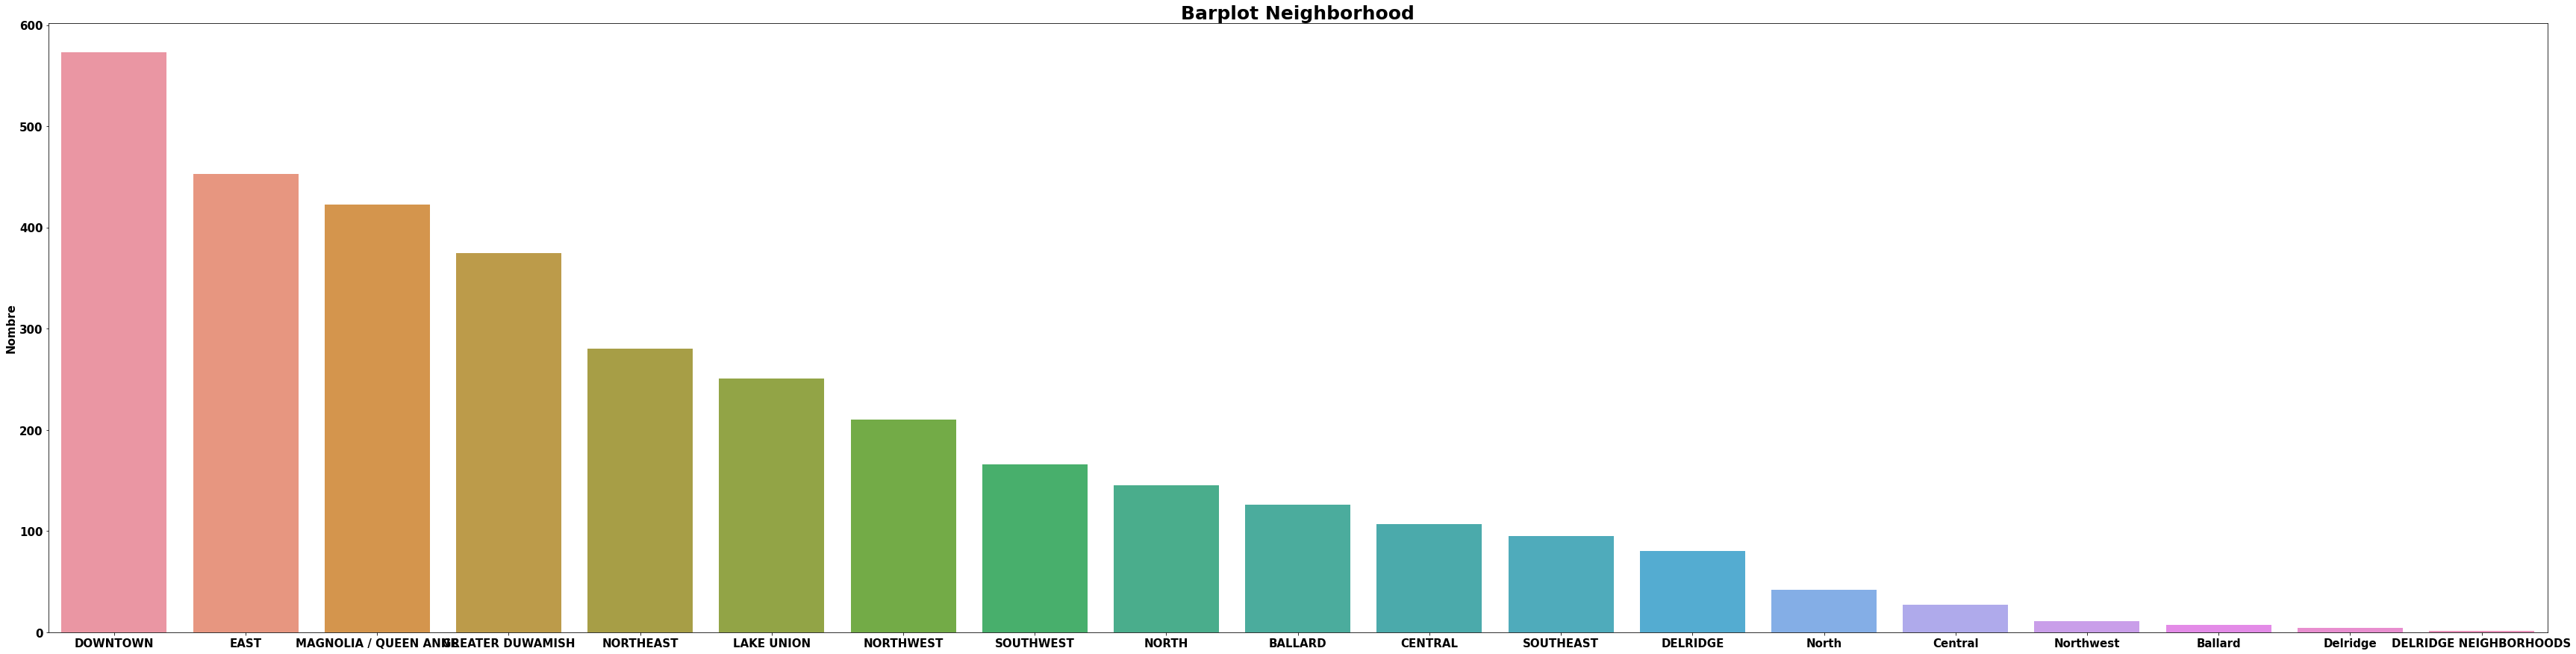

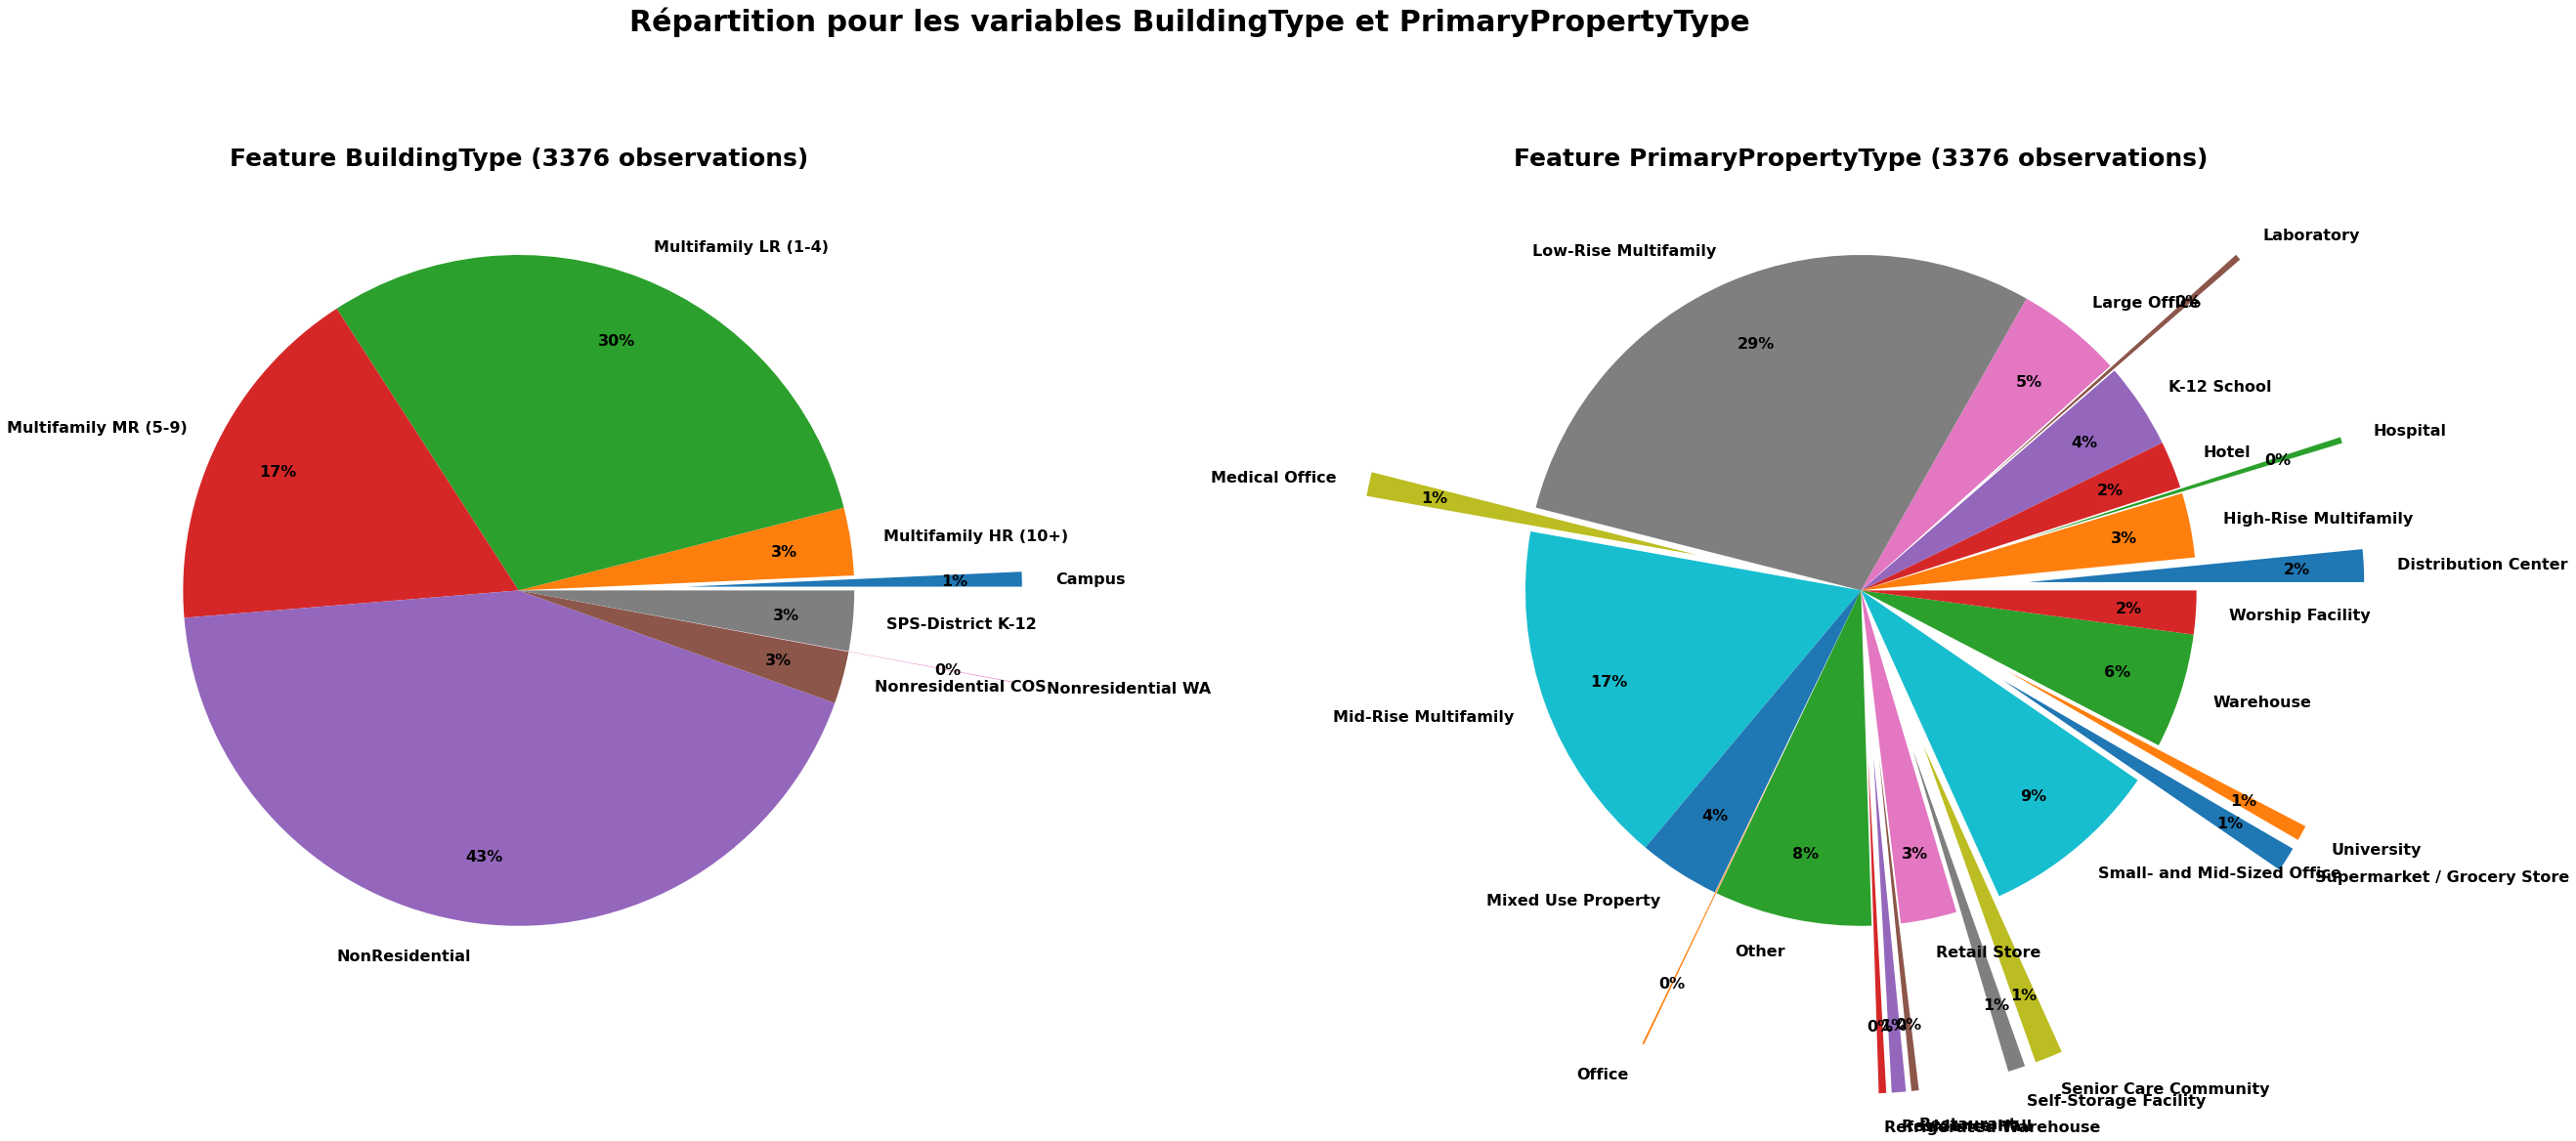

In [57]:
list_quali_viz = ['BuildingType','PrimaryPropertyType', 'Neighborhood']

for var in list_quali_viz:
    figure1 = plt.figure(figsize = (60,15))
    plt.rcParams.update({'font.weight':'bold','font.size': 15})
    plt.title(f'Barplot {var}',fontweight = 'bold',fontsize = 25)
    sns.barplot(x =df_2016_quali[var].value_counts().index, y = df_2016_quali[var].value_counts())
    plt.ylabel('Nombre',fontweight = 'bold')
    plt.show()

figure1 = plt.figure(figsize = (40,20))
plt.rcParams.update({'font.size': 12})
plt.title('Répartition pour les variables BuildingType et PrimaryPropertyType',fontdict = {'fontweight':'bold'},fontsize = 30,pad = 30)
plt.axis('off')
plt.gcf().subplots_adjust(wspace = 0.6, hspace = 0)
count = 1
for var in ['BuildingType','PrimaryPropertyType']:
    x = df_2016_quali[var].value_counts().sort_index()
    expl = [0 if i/x.sum() > 0.02 else 0.5 for i in x]
    figure1.add_subplot(1,2,count)
    plt.title(f'Feature {var} ({x.sum()} observations)',fontdict = {'fontweight':'bold','fontsize':25})
    plt.pie(x,labels = [i for i in x.index] ,autopct = "%.0f%%" , pctdistance = 0.8, explode = expl,textprops={'fontsize': 16,'fontweight':'bold'})
    count+=1
plt.savefig('Pie_chart_buildingType_primary_property_2016.jpg',dpi = 300,bbox_inches = 'tight')
plt.show()


--> Categories BuildingType and PrimaryPropertyType use will be useful to filter non-residential building at first (It seems that we have a lot of residential building)

### Filetring non-residential building with the qualitatives variables

In [59]:
df_2016_clean = df_2016.loc[~((df_2016['BuildingType'].str.contains('Multifamily').fillna(False))|(df_2016['PrimaryPropertyType'].str.contains('Multifamily|Residence Hall').fillna(False)))].copy()
df_2016_clean

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


--> After this first filter we have 1644 building non-residential

### **Quantitative variables exploration**

In [60]:
df_2016_clean_quanti = df_2016_clean.select_dtypes(include = ['int64','float64','bool'])
df_2016_clean_quanti.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1644.000000,1644.0,1628.000000,1644.000000,1644.000000,1644.000000,1644.000000,1642.000000,1644.000000,1.644000e+03,...,1.642000e+03,1.641000e+03,1.642000e+03,1.642000e+03,1.642000e+03,1.642000e+03,1.642000e+03,0.0,1642.000000,1642.000000
mean,16165.277372,2016.0,98116.650491,4.354623,47.615638,-122.333068,1961.935523,1.171742,4.128345,1.195329e+05,...,8.508945e+06,8.127506e+06,5.170213e+05,1.727994e+06,5.895915e+06,1.983363e+04,1.983363e+06,NaN,186.347004,1.609683
std,13754.569217,0.0,17.948573,2.201125,0.048329,0.024652,32.667501,2.952557,6.600039,2.993950e+05,...,3.045570e+07,2.218921e+07,5.553330e+06,6.137739e+06,2.094196e+07,9.436766e+04,9.436766e+06,NaN,757.276699,2.349716
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,578.750000,2016.0,98105.000000,2.000000,47.584805,-122.343335,1930.000000,1.000000,1.000000,2.959550e+04,...,1.220944e+06,1.291405e+06,0.000000e+00,2.117995e+05,7.226602e+05,0.000000e+00,0.000000e+00,NaN,19.882500,0.350000
50%,21135.500000,2016.0,98109.000000,4.000000,47.612220,-122.333030,1965.000000,1.000000,2.000000,4.971200e+04,...,2.554947e+06,2.685146e+06,0.000000e+00,4.728610e+05,1.613402e+06,4.962287e+03,4.962285e+05,NaN,49.485000,0.875000
75%,24589.500000,2016.0,98125.000000,7.000000,47.649017,-122.321848,1989.000000,1.000000,4.000000,1.050708e+05,...,6.963231e+06,7.204080e+06,0.000000e+00,1.433429e+06,4.890860e+06,1.522715e+04,1.522715e+06,NaN,143.102500,1.887500
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


--> On a first look we can underline a few categories:
- Building characteristic that could be found on a building licence (may be useful for our models)
- Geographical informations
- Basic informations (ID, DataYear), which will not be useful except YearBuilt/DataYear (we could create a Building year feature for our models)
- Energie informations that seem to come from survey


--> We can identify our targets: 'SiteEnergyUse(kBtu)' and 'TotalGHGEmissions'

--> We have also ENERGYSTARSCORE which should be used in our study to evaluate its utilitie regarding TotalGHGEmissions

In [61]:
## creating lists to explore our data
list_charact = ['PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','NumberofBuildings','NumberofFloors']
list_eng_info = ['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)']
list_geo_inf = ['ZipCode','CouncilDistrictCode','Latitude','Longitude']
list_target_labels = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']
list_age = ['DataYear','YearBuilt']

**Visualize : Geographic informations**

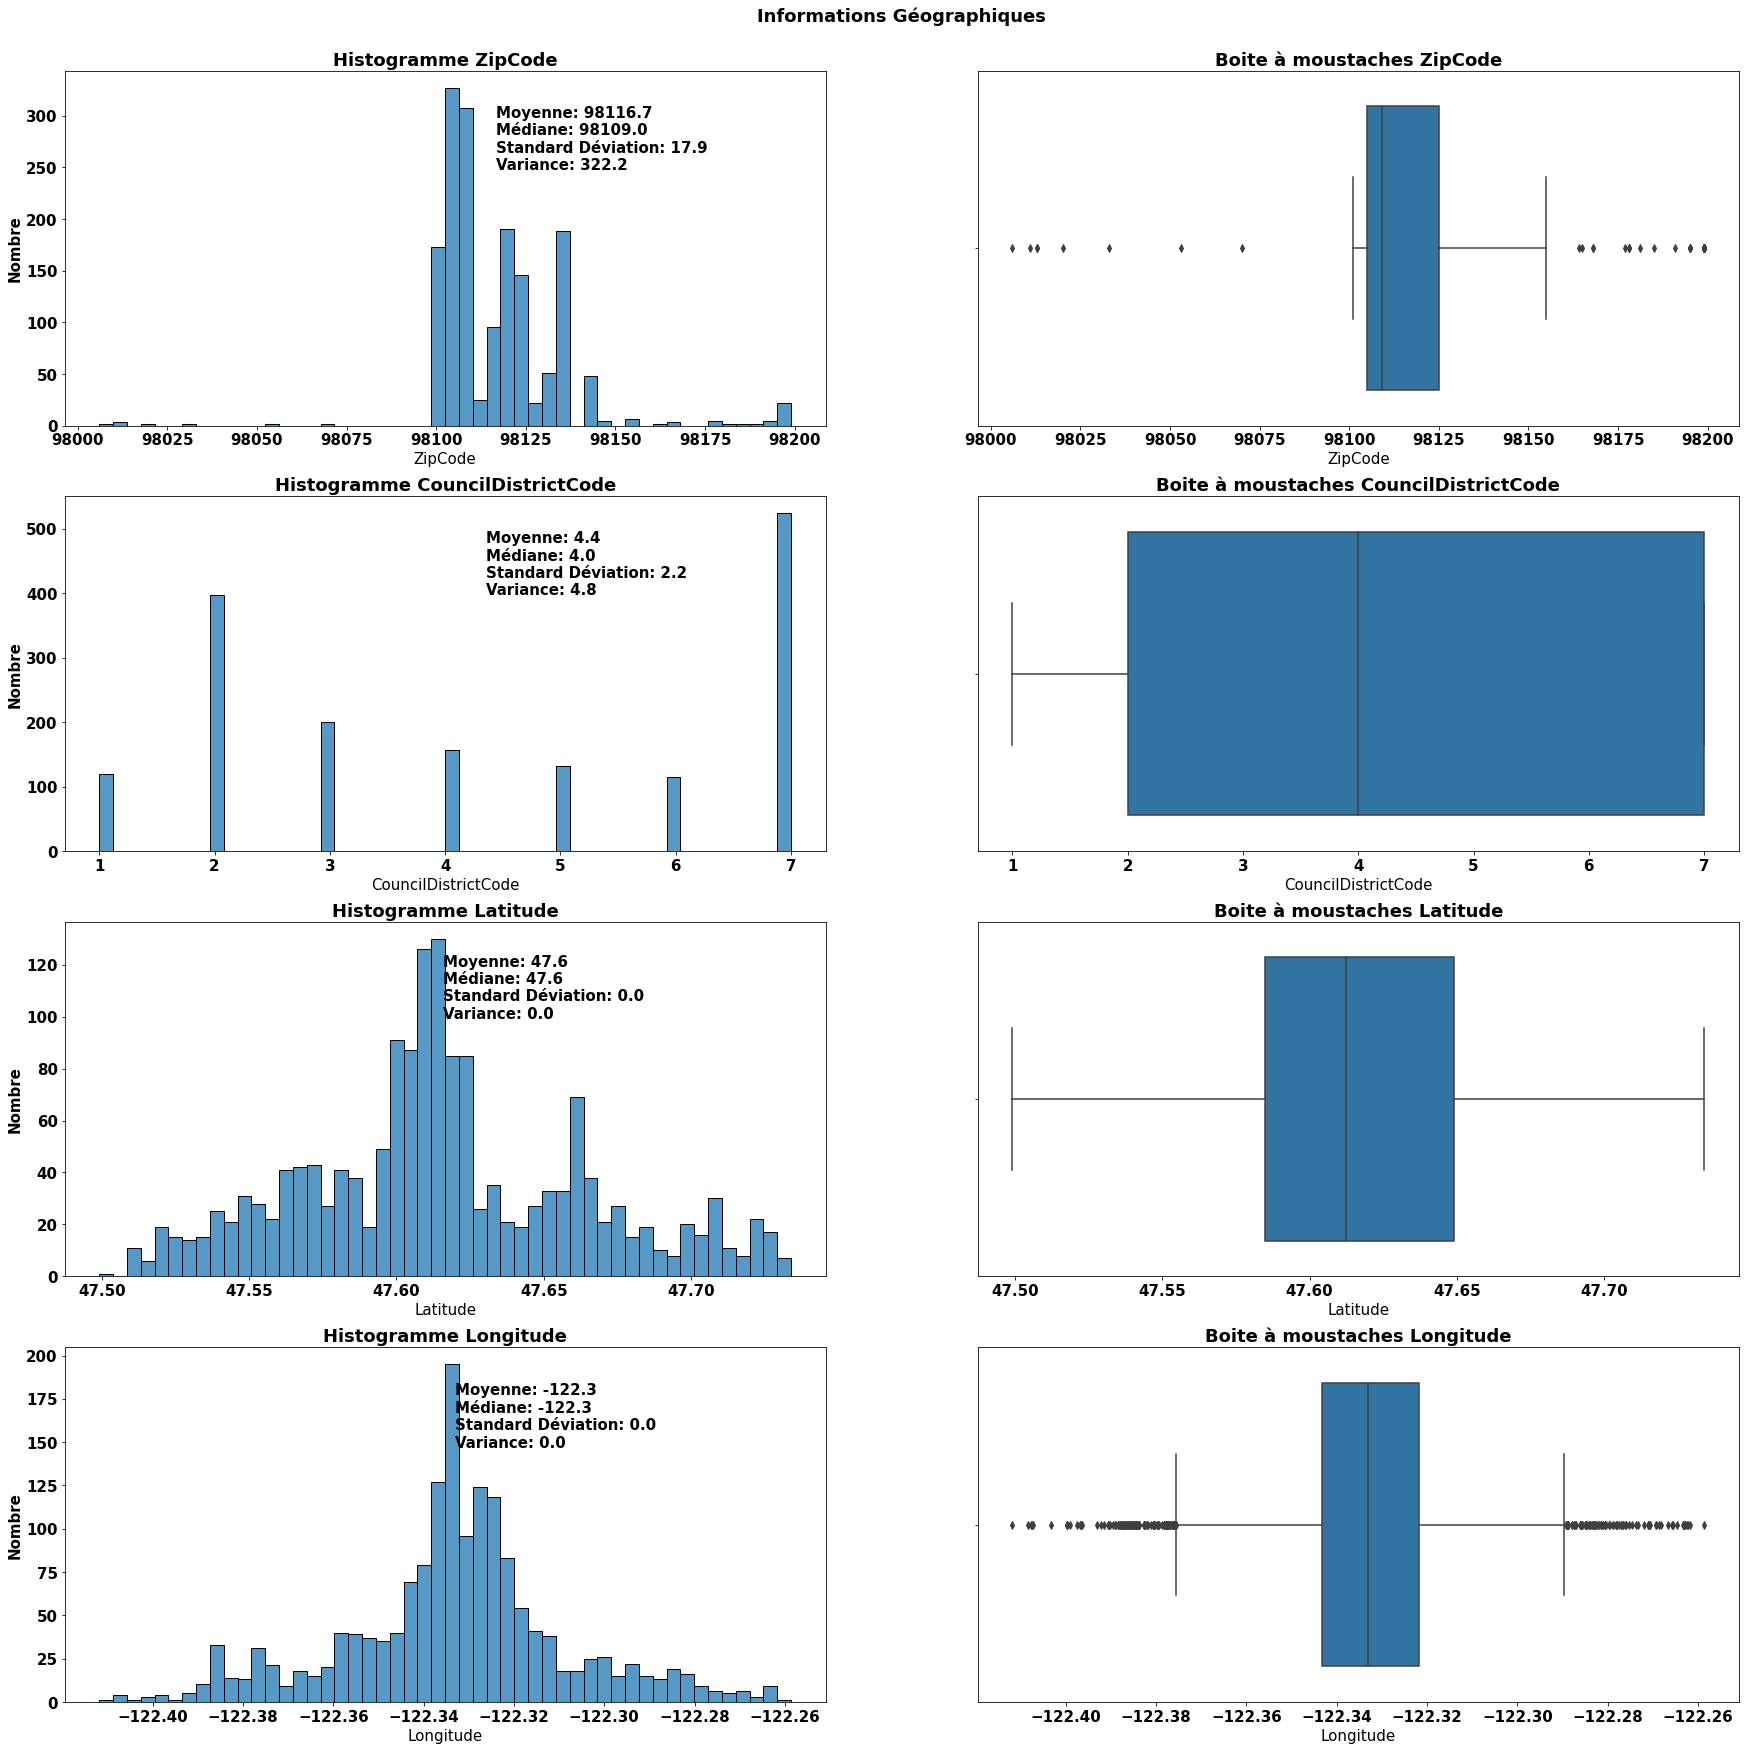

In [62]:
figure2 = plt.figure(figsize = (30,30))
plt.rcParams.update({'font.size': 15})
plt.title('Informations Géographiques',fontweight = 'bold',pad = 50)
plt.axis('off')
count = 1
for name in list_geo_inf:
    mean = df_2016_clean[name].mean()
    med = df_2016_clean[name].median()
    std = df_2016_clean[name].std()
    var = df_2016_clean[name].var()
    figure2.add_subplot(len(list_geo_inf),2,count)
    plt.title(f'Histogramme {name}',fontweight = 'bold')
    ax = sns.histplot(x = name, data = df_2016_clean ,bins = 50)
    plt.ylabel('Nombre',fontweight = 'bold')
    ax.text(df_2016_clean[name].mean(), (df_2016_clean[name].value_counts(bins = 50).max())*0.75, f'Moyenne: {mean:.1f}\nMédiane: {med:.1f}\nStandard Déviation: {std:.1f}\nVariance: {var:.1f}', ha='left', va= 'bottom',size = 15 ,fontweight = 'bold')
    count+=1
    figure2.add_subplot(len(list_geo_inf),2,count)
    plt.title(f'Boite à moustaches {name}',fontweight = 'bold')
    sns.boxplot(x = name,y = ['']*len(df_2016_clean), data = df_2016_clean)
    count+=1
plt.show()

--> We can underline centered distribution for latitude and longitude. We can see the concentration of building in which may be the downtown <br/>
--> We will investigate later the relation with our targets regarding latitude and longitude.

**Visualize : Energy informations**

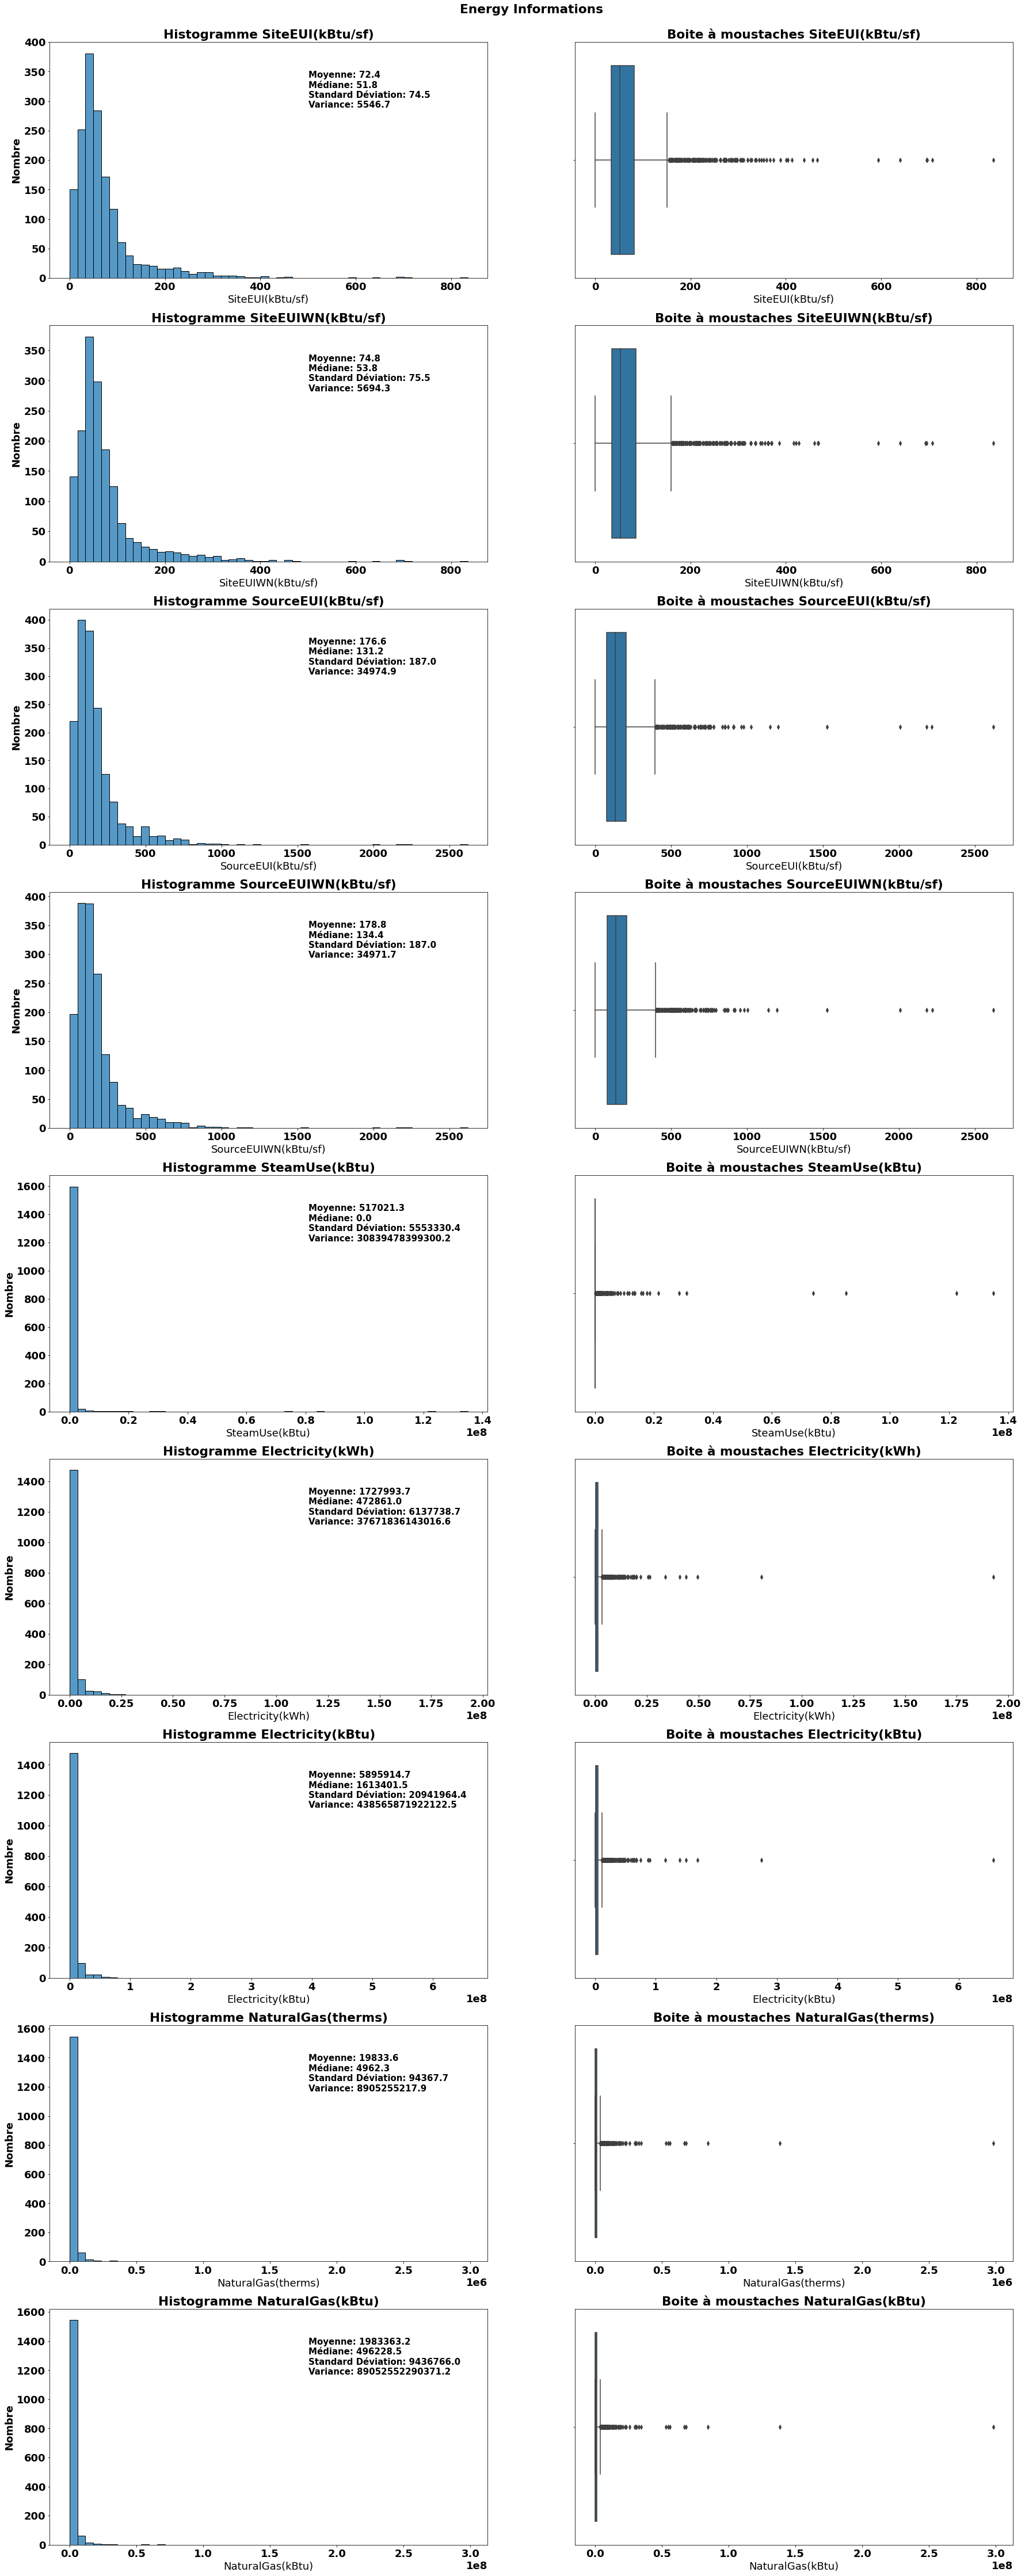

In [63]:
figure3 = plt.figure(figsize = (30,80))
plt.rcParams.update({'font.size': 18})
plt.title('Energy Informations',fontweight = 'bold',pad = 50)
plt.axis('off')
count = 1
for name in list_eng_info:
    mean = df_2016_clean[name].mean()
    med = df_2016_clean[name].median()
    std = df_2016_clean[name].std()
    var = df_2016_clean[name].var()
    figure3.add_subplot(len(list_eng_info),2,count)
    plt.title(f'Histogramme {name}',fontweight = 'bold')
    ax = sns.histplot(x = name, data = df_2016_clean ,bins = 50)
    plt.ylabel('Nombre',fontweight = 'bold')
    ax.text(df_2016_clean[name].max()*0.6, (df_2016_clean[name].value_counts(bins = 50).max())*0.75, f'Moyenne: {mean:.1f}\nMédiane: {med:.1f}\nStandard Déviation: {std:.1f}\nVariance: {var:.1f}', ha='left', va= 'bottom',size = 15 ,fontweight = 'bold')
    count+=1
    figure3.add_subplot(len(list_eng_info),2,count)
    plt.title(f'Boite à moustaches {name}',fontweight = 'bold')
    sns.boxplot(x = name,y = ['']*len(df_2016_clean), data = df_2016_clean)
    count+=1
plt.show()

--> All those distribution seem right skwewed. <br/>
--> We can't use those variables for our models. Those variables come from survey and they will introduce 'data leakage' in our predictions. We may do features ingineering to get basics informations regarding types of energy use but not much more. Maybe we could take a mean ratio of energy use by BuildingType or energy type use?

**Visualize: Characteristics informations**

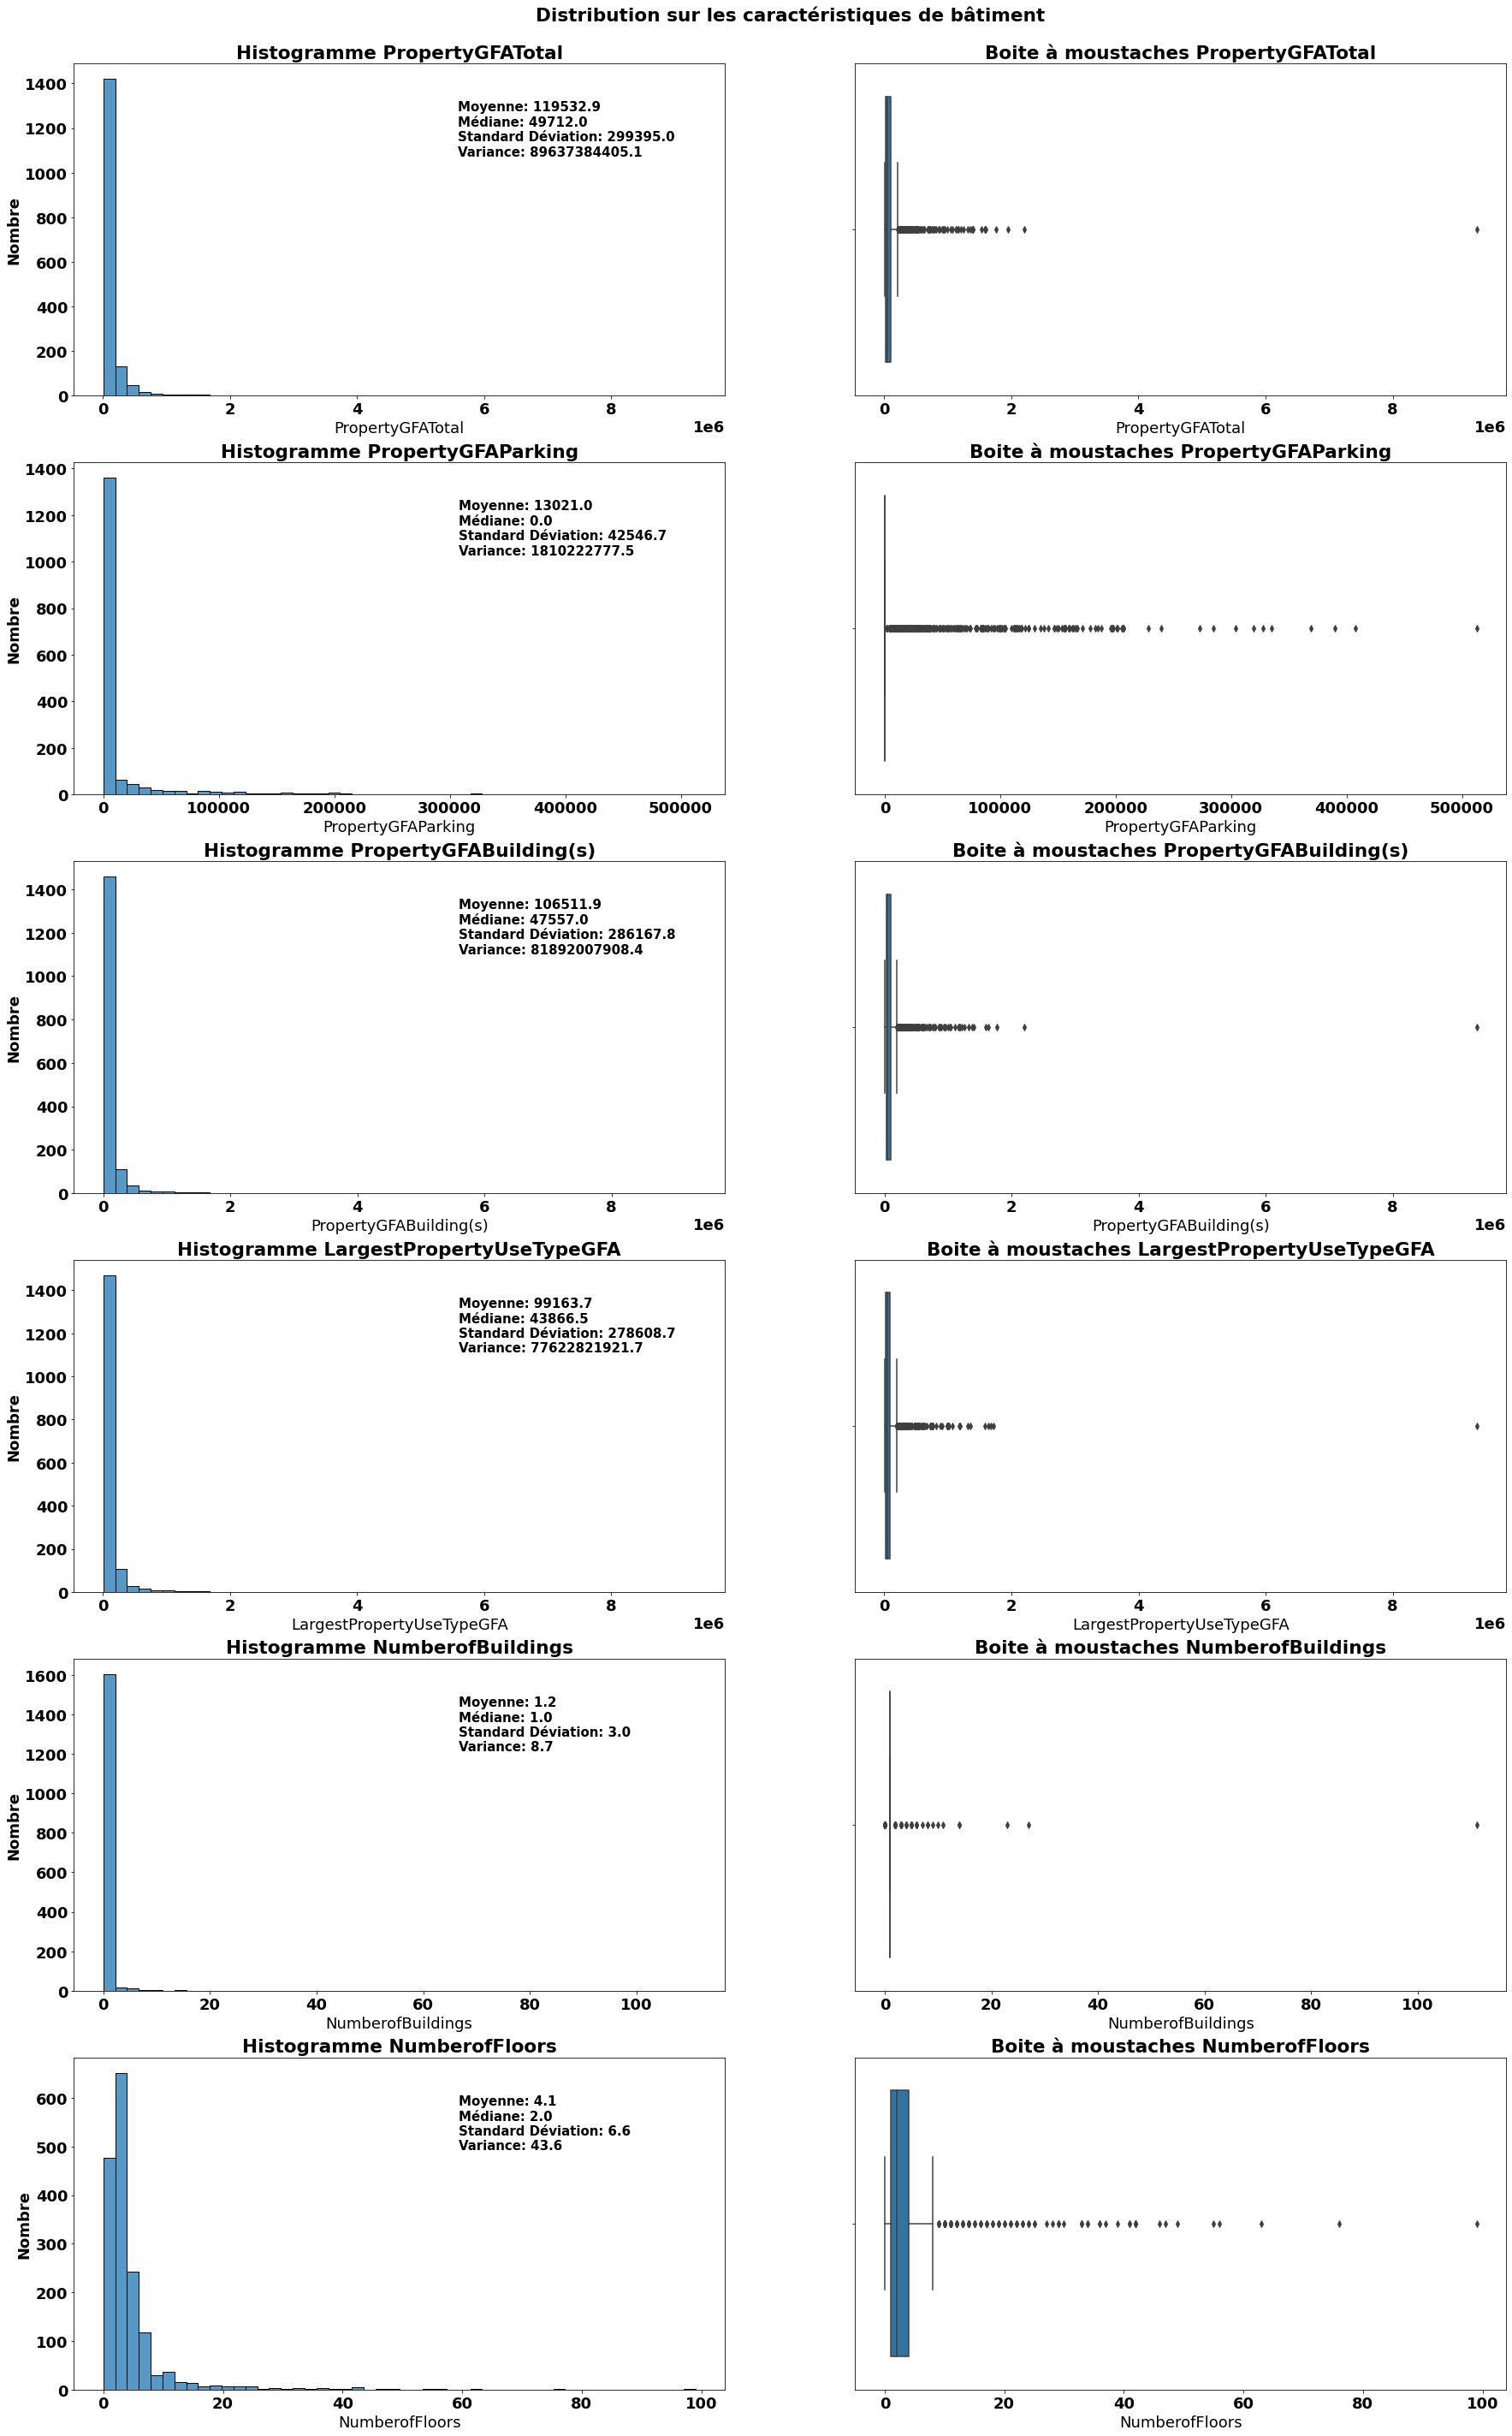

In [64]:
figure4 = plt.figure(figsize = (30,50))
plt.rcParams.update({'font.size': 18})
plt.title('Distribution sur les caractéristiques de bâtiment',fontweight = 'bold',pad = 50)
plt.axis('off')
count = 1
for name in list_charact:
    mean = df_2016_clean[name].mean()
    med = df_2016_clean[name].median()
    std = df_2016_clean[name].std()
    var = df_2016_clean[name].var()
    figure4.add_subplot(len(list_charact),2,count)
    plt.title(f'Histogramme {name}',fontweight = 'bold')
    ax = sns.histplot(x = name, data = df_2016_clean ,bins = 50)
    plt.ylabel('Nombre',fontweight = 'bold')
    ax.text(df_2016_clean[name].max()*0.6, (df_2016_clean[name].value_counts(bins = 50).max())*0.75, f'Moyenne: {mean:.1f}\nMédiane: {med:.1f}\nStandard Déviation: {std:.1f}\nVariance: {var:.1f}', ha='left', va= 'bottom',size = 15 ,fontweight = 'bold')
    count+=1
    figure4.add_subplot(len(list_charact),2,count)
    plt.title(f'Boite à moustaches {name}',fontweight = 'bold')
    sns.boxplot(x = name,y = ['']*len(df_2016_clean), data = df_2016_clean)
    count+=1
plt.savefig('Building_characteristics.jpg',dpi = 300,bbox_inches = 'tight' )
plt.show()

--> Those variable could come from building licence we can consider some of them for our models. <br/>
--> Variables related to Parking characteristics seemed the least important from a job point of view. It may be the characteristic that have a minimum impact on energy consumption. <br/>
--> All those distribution seem right skweewed. We may consider log transformation to center their distributions later. Some outliers could also been removed

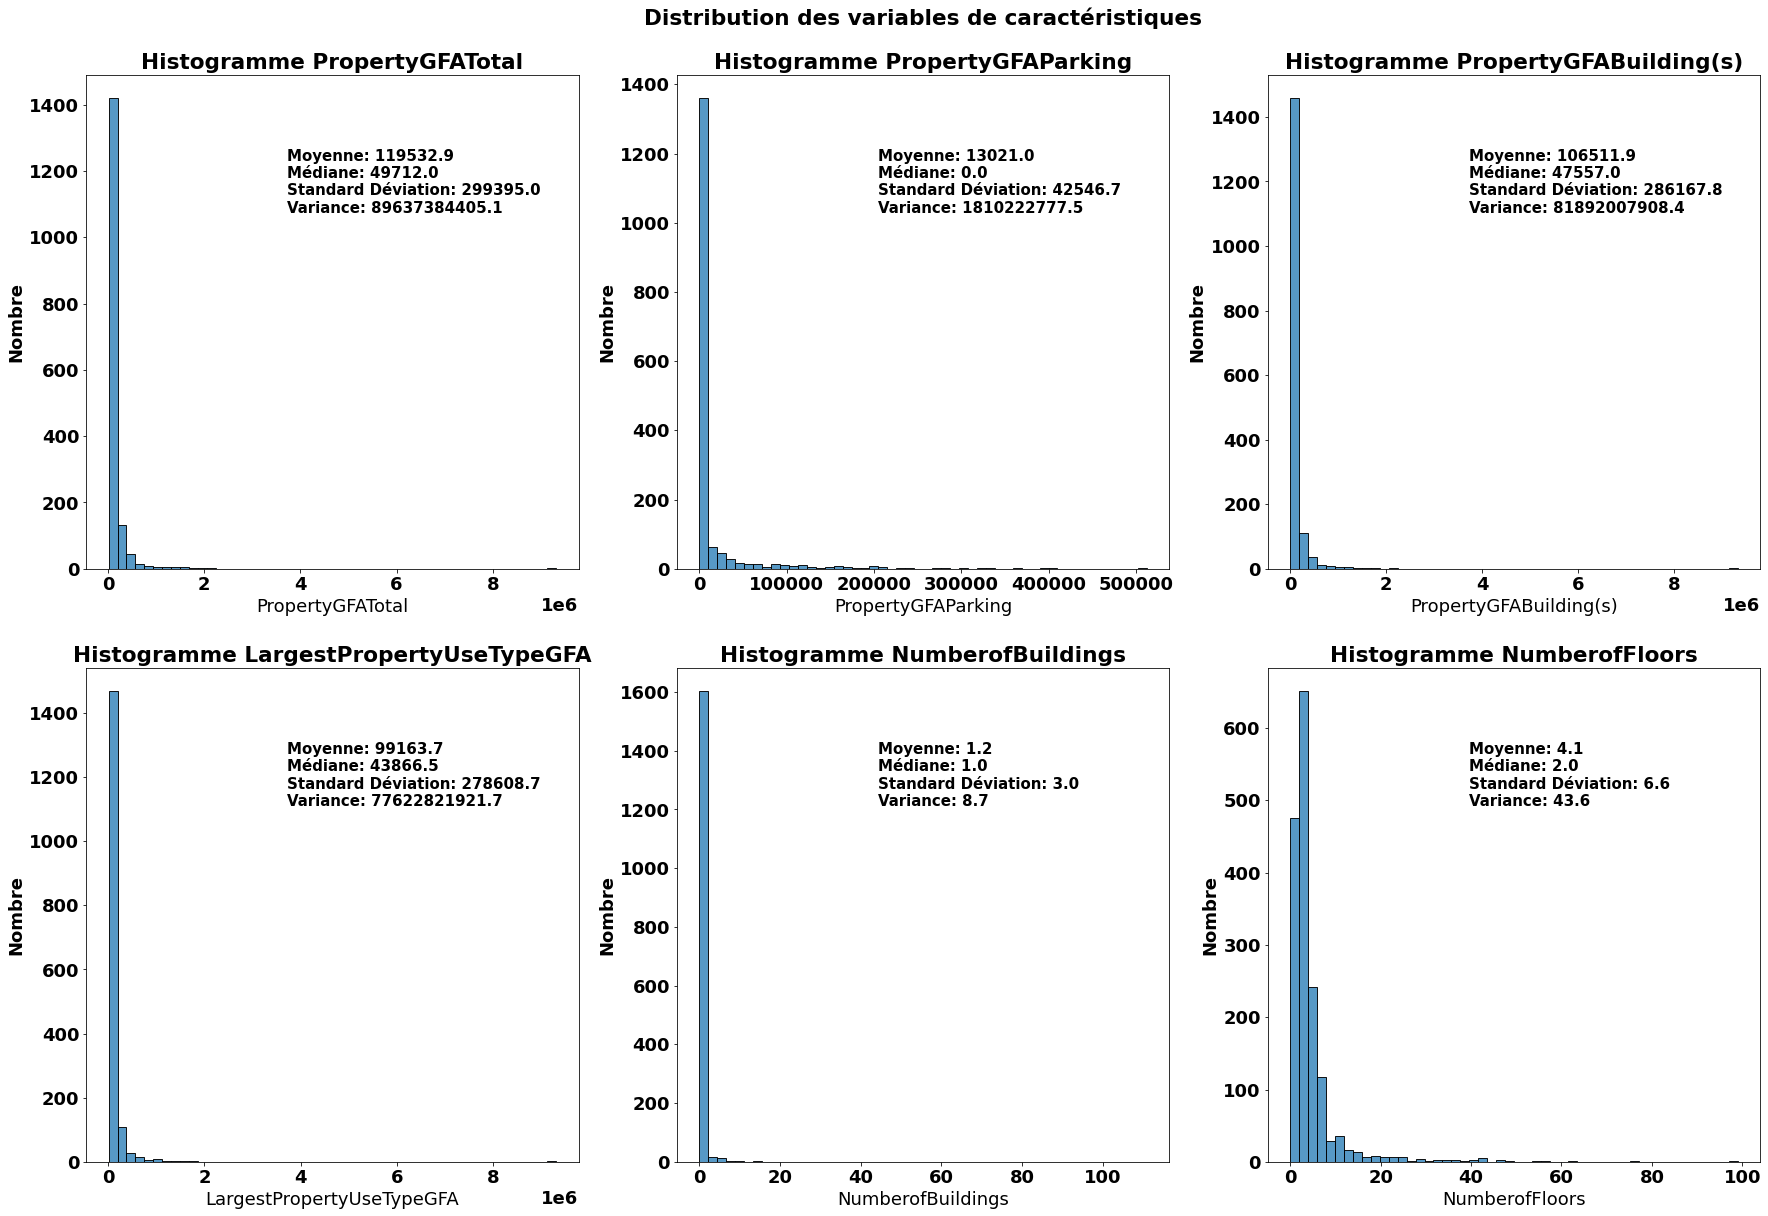

In [65]:
figure4 = plt.figure(figsize = (30,20))
plt.rcParams.update({'font.size': 18})
plt.title('Distribution des variables de caractéristiques',fontweight = 'bold',pad = 50)
plt.axis('off')
count = 1
for name in list_charact:
    mean = df_2016_clean[name].mean()
    med = df_2016_clean[name].median()
    std = df_2016_clean[name].std()
    var = df_2016_clean[name].var()
    figure4.add_subplot(2,3,count)
    plt.title(f'Histogramme {name}',fontweight = 'bold')
    ax = sns.histplot(x = name, data = df_2016_clean ,bins = 50)
    plt.ylabel('Nombre',fontweight = 'bold')
    ax.text(df_2016_clean[name].max()*0.4, (df_2016_clean[name].value_counts(bins = 50).max())*0.75, f'Moyenne: {mean:.1f}\nMédiane: {med:.1f}\nStandard Déviation: {std:.1f}\nVariance: {var:.1f}', ha='left', va= 'bottom',size = 15 ,fontweight = 'bold')
    count+=1
plt.savefig('Variables not centered.jpg',dpi = 300,bbox_inches = 'tight' )
plt.show()

**Visualize : ENERGYSTARSCORE**

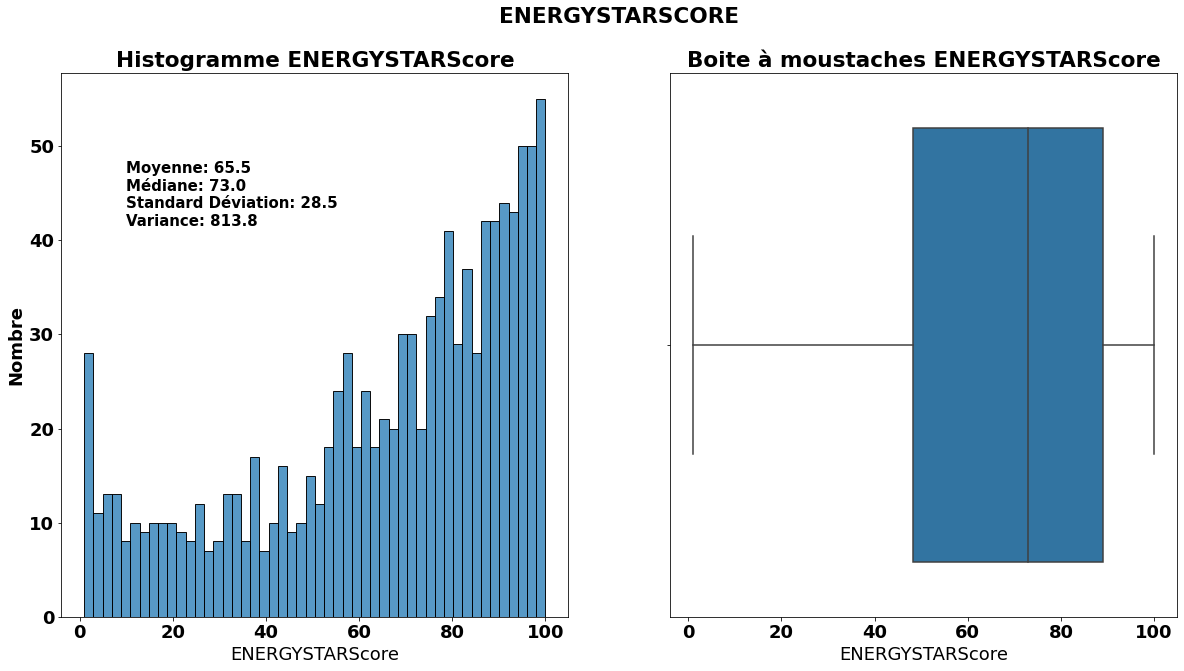

In [66]:
figure5 = plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size': 18})
plt.title('ENERGYSTARSCORE',fontweight = 'bold',pad = 50)
plt.axis('off')
count = 1
mean = df_2016_clean['ENERGYSTARScore'].mean()
med = df_2016_clean['ENERGYSTARScore'].median()
std = df_2016_clean['ENERGYSTARScore'].std()
var = df_2016_clean['ENERGYSTARScore'].var()
figure5.add_subplot(1,2,count)
plt.title(f'Histogramme ENERGYSTARScore',fontweight = 'bold')
ax = sns.histplot(x = 'ENERGYSTARScore', data = df_2016_clean ,bins = 50)
plt.ylabel('Nombre',fontweight = 'bold')
ax.text(df_2016_clean['ENERGYSTARScore'].max()*0.1, (df_2016_clean['ENERGYSTARScore'].value_counts(bins = 50).max())*0.75, f'Moyenne: {mean:.1f}\nMédiane: {med:.1f}\nStandard Déviation: {std:.1f}\nVariance: {var:.1f}', ha='left', va= 'bottom',size = 15 ,fontweight = 'bold')
count+=1
figure5.add_subplot(1,2,count)
plt.title(f'Boite à moustaches ENERGYSTARScore',fontweight = 'bold')
sns.boxplot(x = 'ENERGYSTARScore',y = ['']*len(df_2016_clean), data = df_2016_clean)
count+=1
plt.show()

--> We have not the ENERGYSTARSCORE for all or building available in the dataset

--> not much to say about the ENERGYSTARSCORE, we will try to evaluate if it can improve or not our prediction on TotalGHGEmissions

**Visualize : the targets for our models**

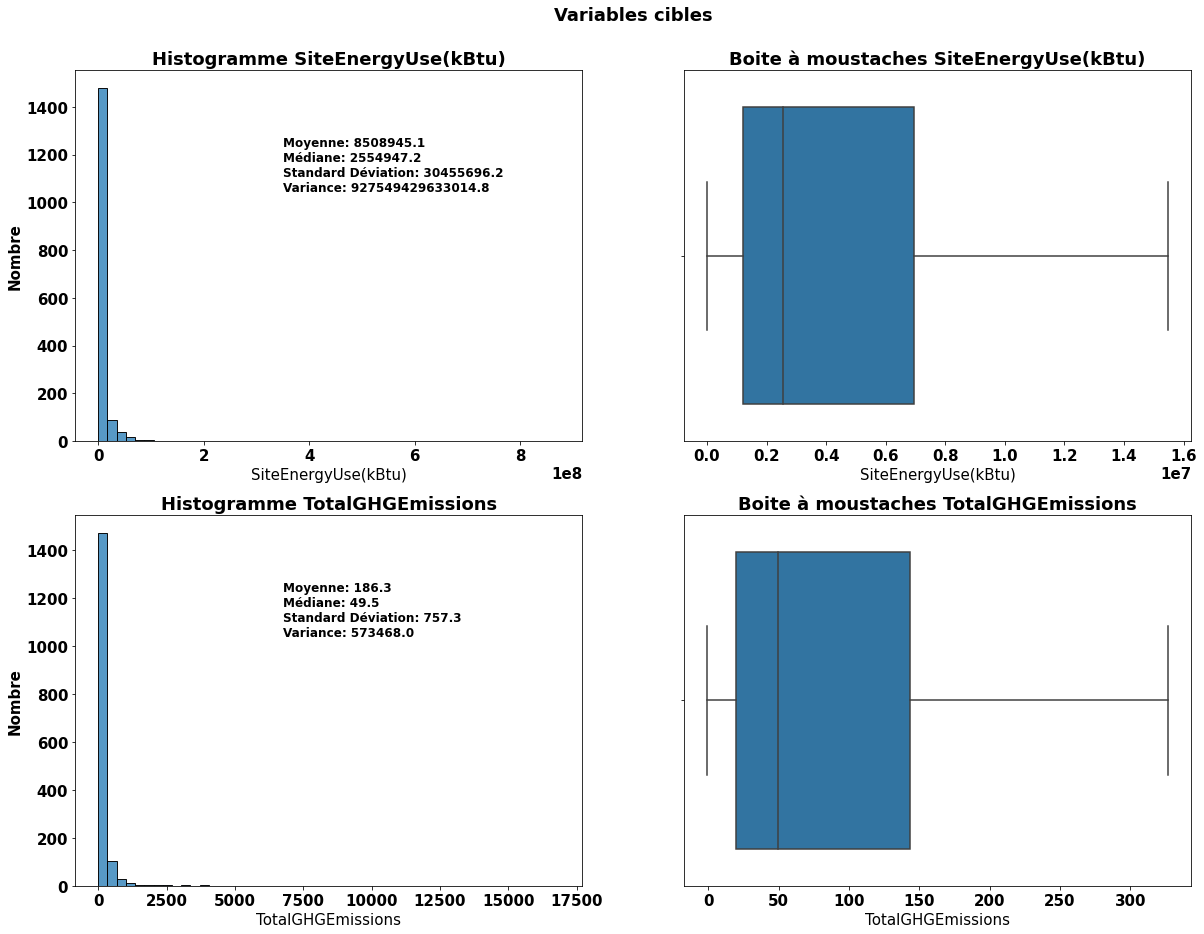

In [67]:
figure6 = plt.figure(figsize = (20,15))
plt.rcParams.update({'font.size': 15})
plt.title('Variables cibles',fontweight = 'bold',pad = 50)
plt.axis('off')
count = 1
for name in list_target_labels:
    mean = df_2016_clean[name].mean()
    med = df_2016_clean[name].median()
    std = df_2016_clean[name].std()
    var = df_2016_clean[name].var()
    figure6.add_subplot(len(list_target_labels),2,count)
    plt.title(f'Histogramme {name}',fontweight = 'bold')
    ax = sns.histplot(x = name, data = df_2016_clean ,bins = 50)
    plt.ylabel('Nombre',fontweight = 'bold')
    ax.text(df_2016_clean[name].max()*0.4, (df_2016_clean[name].value_counts(bins = 50).max())*0.70, f'Moyenne: {mean:.1f}\nMédiane: {med:.1f}\nStandard Déviation: {std:.1f}\nVariance: {var:.1f}', ha='left', va= 'bottom',size = 12 ,fontweight = 'bold')
    count+=1
    figure6.add_subplot(len(list_target_labels),2,count)
    plt.title(f'Boite à moustaches {name}',fontweight = 'bold')
    sns.boxplot(x = name,y = ['']*len(df_2016_clean), data = df_2016_clean,showfliers=False)
    count+=1
#plt.savefig('Distribution_boite_à_moustahces_cibles.jpg',bbox_inches = 'tight')
plt.show()

--> Distribution of our targets are very similar. Right Skweeded. As for some of potential features we could pass our targets to the log to center their distributions

--> We have also some outliers, it may be an option two filter the outliers on our variables. Some model can be sensitive to those observations

**Is there a linear correlation between our targets?**

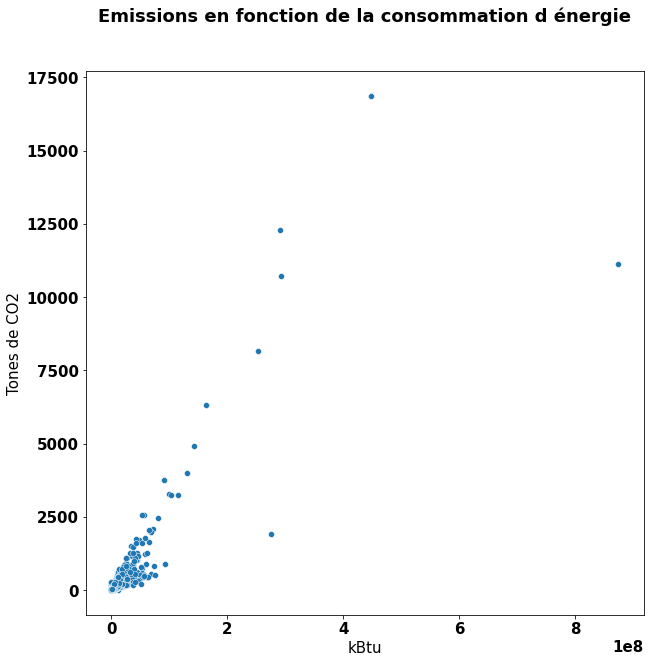

In [68]:
figure7 = plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 15})
plt.title('Emissions en fonction de la consommation d énergie',fontweight = 'bold',pad = 50)
sns.scatterplot(x = 'SiteEnergyUse(kBtu)' ,y = 'TotalGHGEmissions',data = df_2016_clean)
plt.xlabel('kBtu')
plt.ylabel('Tones de CO2')
plt.show()


### **Bivariate analysis with our targets**

#### Geographics informations

--> We have some geographic informations regarding building in our Quantitatives and Qualitatives variables, let's try to see if we can see any obvious relations with our target with the variables Latitude and longitude

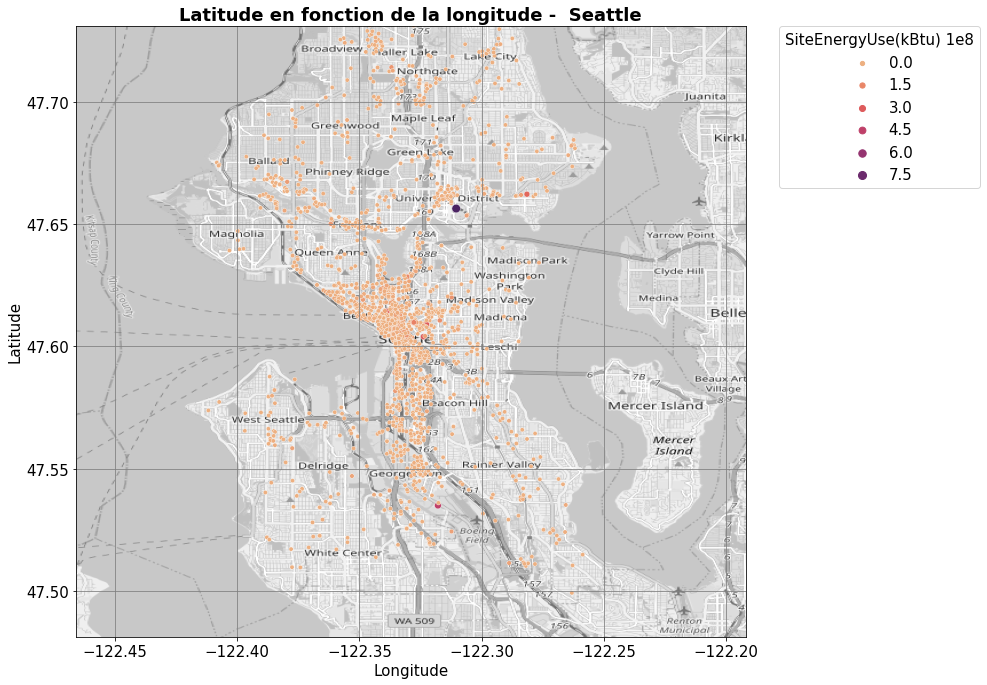

In [69]:
from PIL import Image

#Define the BBox for the map image that we want to display
BBox = (-122.4660,-122.1920,47.4812,47.7310)
seattle_map = Image.open('map_seattle.png').convert("L")
#seattle_map = plt.imread('map_seattle.png')

figure7 = plt.figure(figsize = (12,12))
plt.rcParams.update({'font.weight':'normal','font.size': 15})
plt.title('Latitude en fonction de la longitude -  Seattle',fontweight = 'bold')
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_2016_clean, hue = 'SiteEnergyUse(kBtu)',size = 'SiteEnergyUse(kBtu)',palette = 'flare')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.legend(title = 'SiteEnergyUse(kBtu) 1e8',loc = 'upper left', bbox_to_anchor = (1.05,1), borderaxespad = 0.)
plt.grid(color='gray', linestyle='solid')
ax.imshow(seattle_map,zorder = 0,extent = BBox, aspect = 'equal',cmap = 'gray')
#plt.savefig('SiteEnergyUse_Seattle.png',dpi = 300,bbox_inches = 'tight')
plt.show()

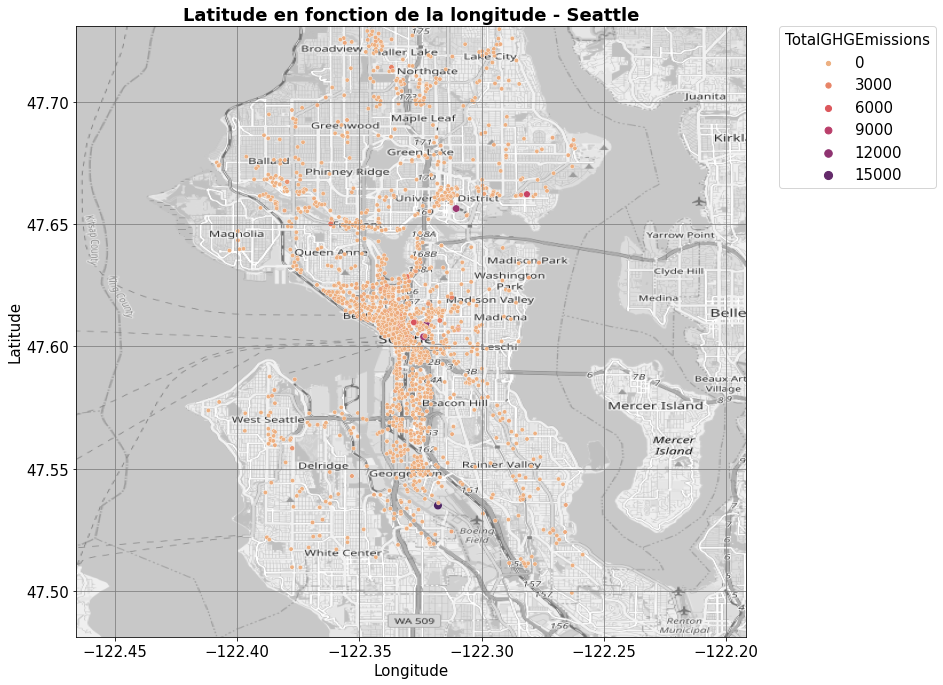

In [70]:
#Define the BBox for the map image that we want to display
BBox = (-122.4660,-122.1920,47.4812,47.7310)
seattle_map = Image.open('map_seattle.png').convert("L")
#seattle_map = plt.imread('map_seattle.png')

figure8 = plt.figure(figsize = (12,12))
plt.rcParams.update({'font.size': 15})
plt.title('Latitude en fonction de la longitude - Seattle',fontweight = 'bold')
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_2016_clean, hue = 'TotalGHGEmissions',size = 'TotalGHGEmissions',palette = 'flare')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.legend(title = 'TotalGHGEmissions',loc = 'upper left', bbox_to_anchor = (1.05,1), borderaxespad = 0.)
plt.grid(color='gray', linestyle='solid')
ax.imshow(seattle_map,zorder = 0,extent = BBox, aspect = 'equal',cmap = 'gray')
#plt.savefig('TotalGHGEmissions_Seattle.png',dpi = 300,bbox_inches = 'tight')
plt.show()

--> Regarding the geographic distribution of our building in Seattle there is no evident pattern related to our targets! We may underline some outliers but not some area with more consumption and CO2 than the others... <br/>
--> We decided not to keep the geographic informations:
- 'Neighnorhoods' / 'Adress' in the qualitatives variables
- 'Latitude', 'Longitude', 'ZipCode','CouncildistrictCode' in the quantitatives variables

#### Correlation evaluation on our quantitatives variables with our targets

--> let's evaluate if there are evident correlation with the quantitatives variables that we may kept for now. Starting with scatterplot in function of our targets

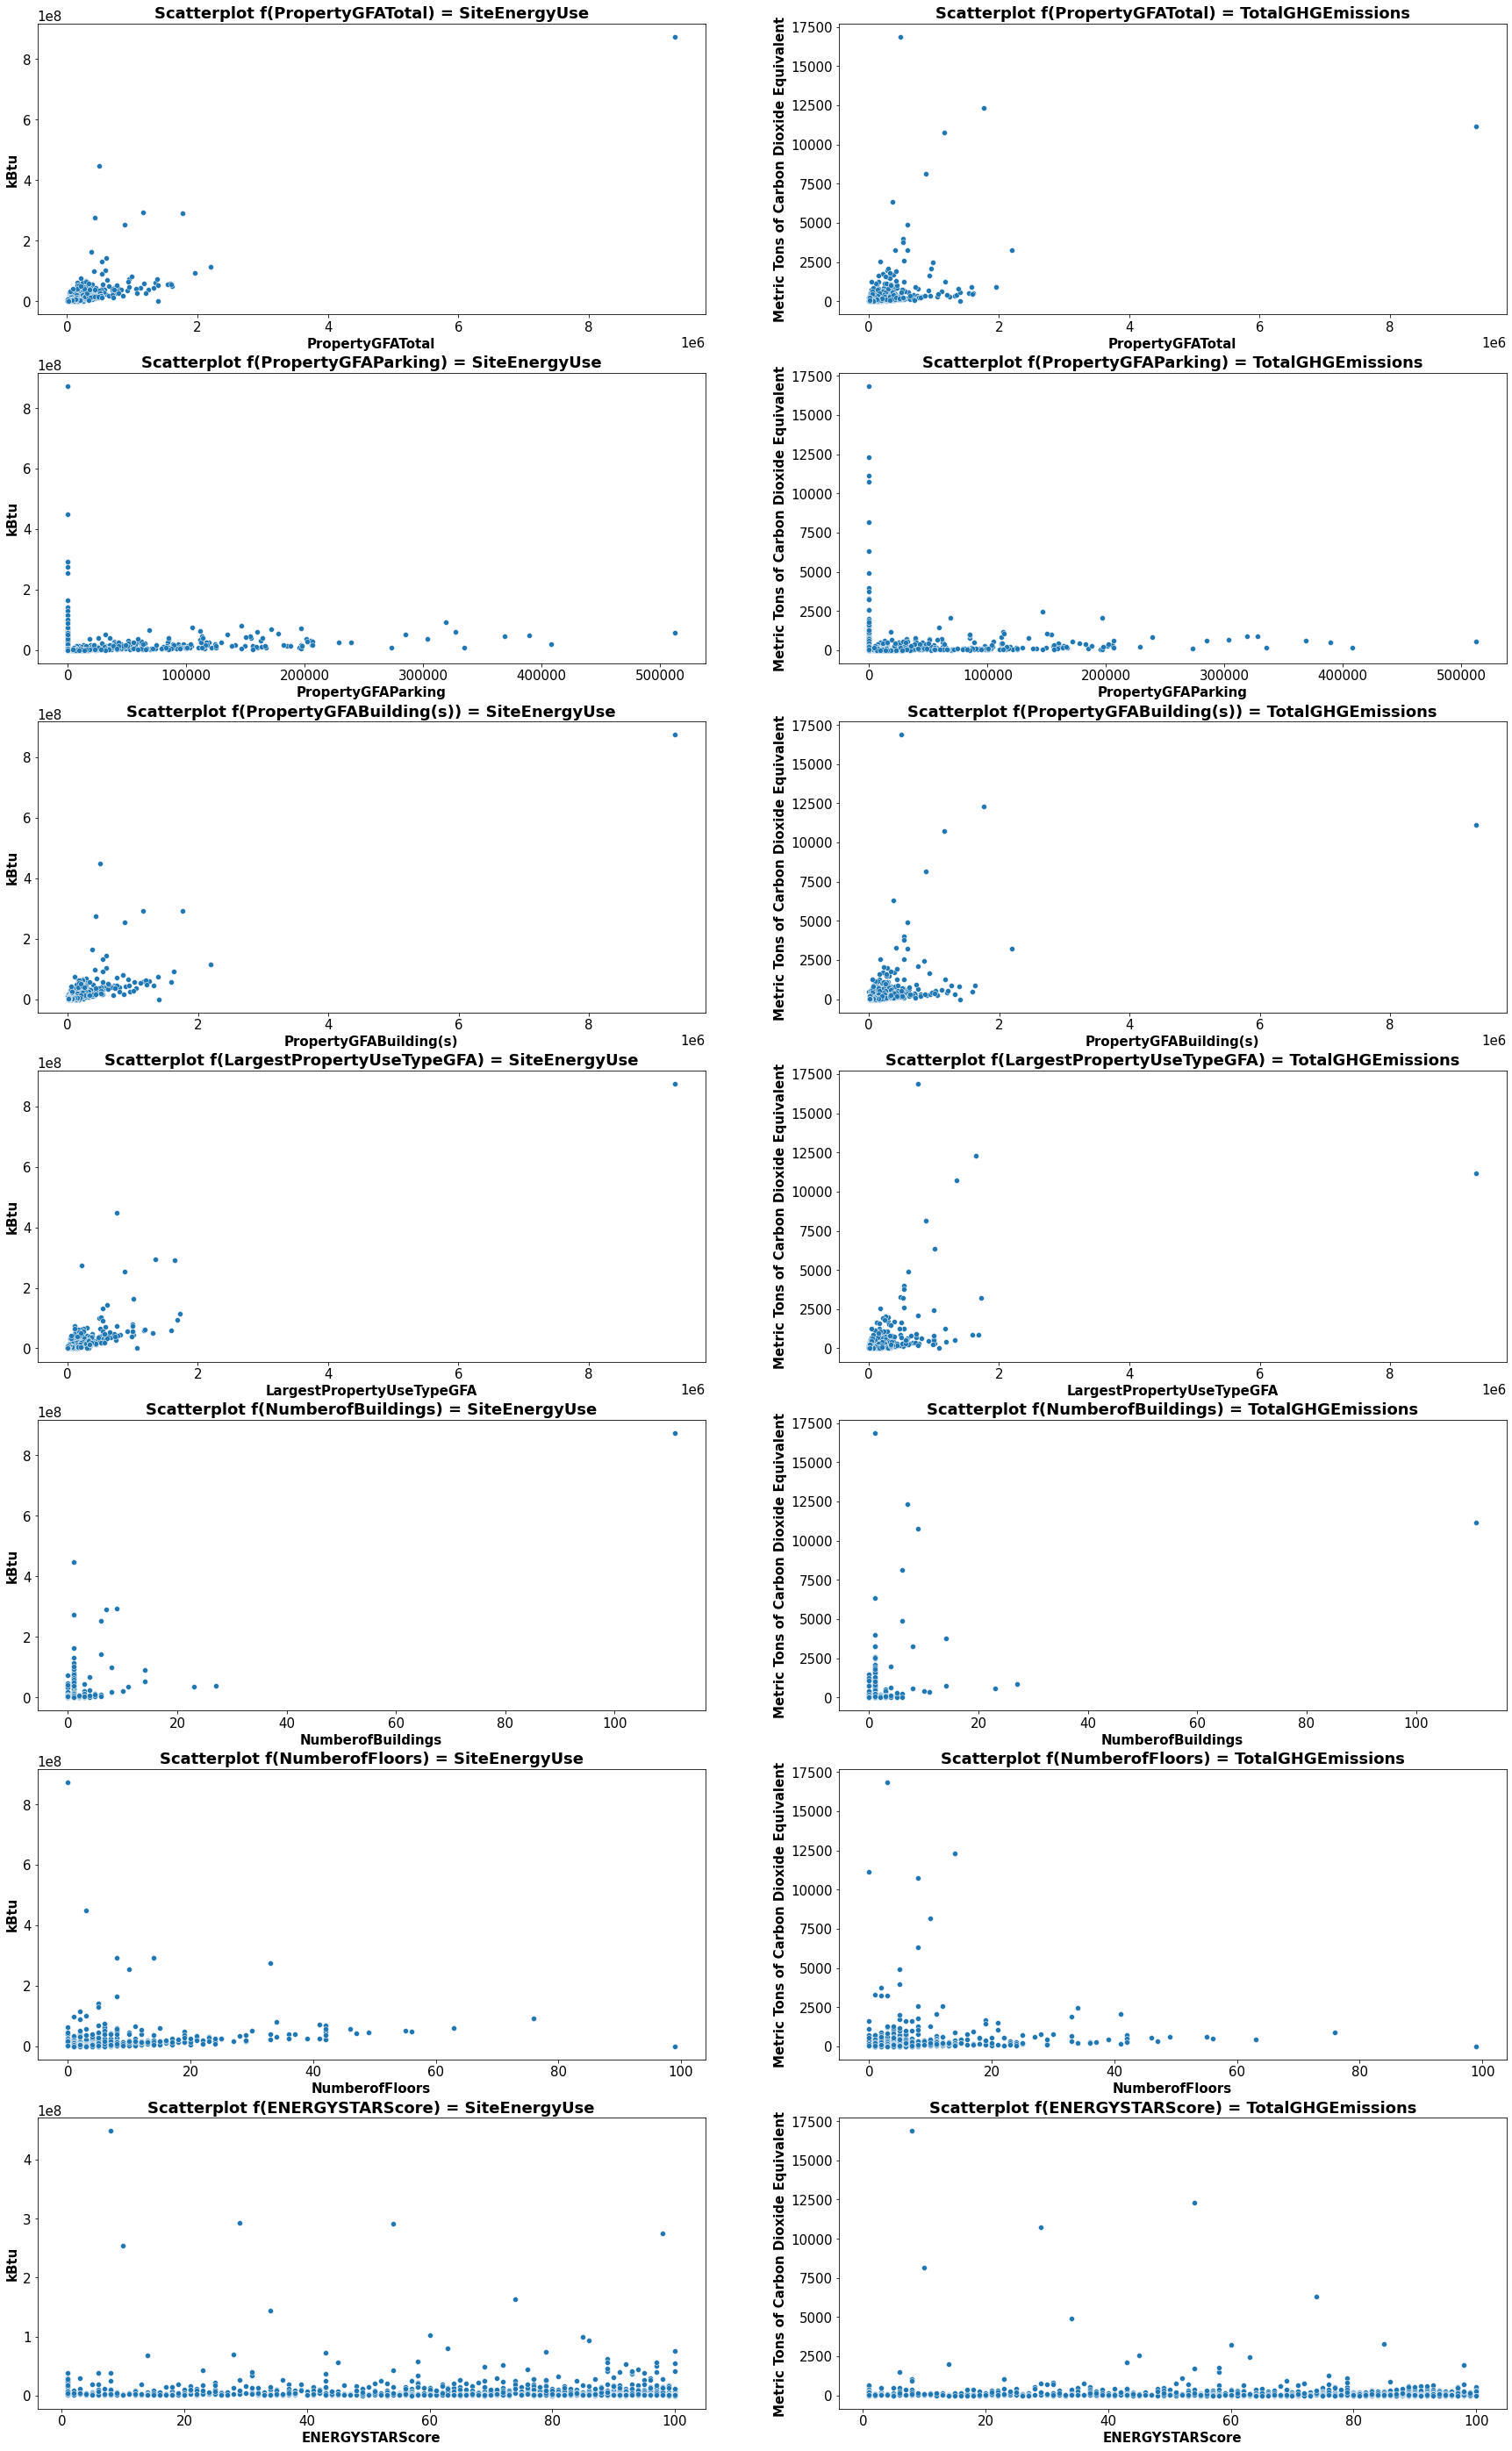

In [71]:
count = 1
figure9 = plt.figure(figsize = (30,50))
plt.rcParams.update({'font.size': 15})
sns.set_palette(sns.color_palette('tab10'))
for name in list_charact+['ENERGYSTARScore']:
    figure9.add_subplot(len(list_charact) + 1,2,count)
    plt.title(f'Scatterplot f({name}) = SiteEnergyUse',fontweight = 'bold')
    sns.scatterplot(x = name ,y = 'SiteEnergyUse(kBtu)',data = df_2016_clean)
    plt.ylabel('kBtu',fontweight = 'bold')
    plt.xlabel(name, fontweight = 'bold')
    count +=1
    figure9.add_subplot(len(list_charact) + 1,2,count)
    plt.title(f'Scatterplot f({name}) = TotalGHGEmissions',fontweight = 'bold')
    sns.scatterplot(x = name ,y = 'TotalGHGEmissions',data = df_2016_clean)
    plt.ylabel('Metric Tons of Carbon Dioxide Equivalent',fontweight = 'bold')
    plt.xlabel(name, fontweight = 'bold')
    count +=1
plt.show()

--> Adding to these graphs a correlation map

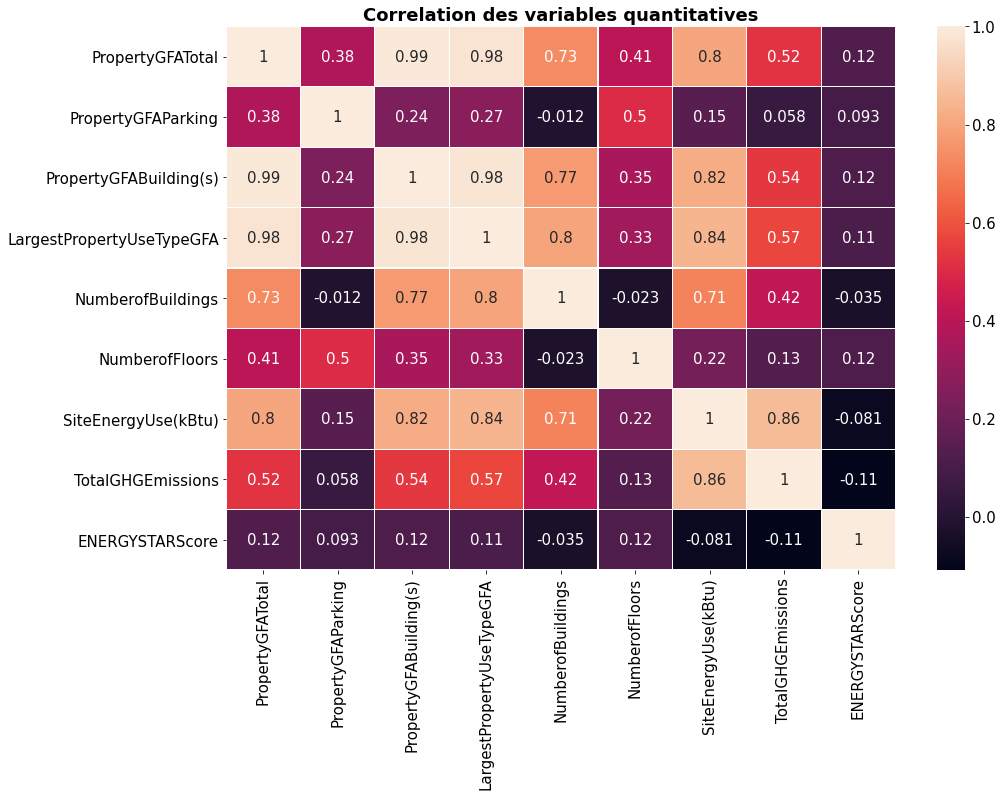

In [72]:
figure10 = plt.figure(figsize = (15,10))
plt.rcParams.update({'font.size': 15})
plt.title(f'Correlation des variables quantitatives',fontweight = 'bold')
sns.heatmap(df_2016_clean[list_charact+['SiteEnergyUse(kBtu)','TotalGHGEmissions','ENERGYSTARScore']].corr(),annot= True, linewidths= 0.3)
#plt.savefig('Correaltion_avec_les_cibles.jpg',dpi = 300,bbox_inches = 'tight')
plt.show()

--> We may have linear relationship with our target for some of these quantitatives variables. <br/>
--> Expect the variables related to parking as mentionned before which is not what seemed the most related to our targets <br/>
--> Let's evaluate the p-value of our linear correlation coefficient to evalaute if our observation are due to the luck

In [73]:
#H0 'variables and target are independent'
#H1 'variables and target are dependent'

list_numerical_features = ['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA']

# target1: SiteEnergyUse(kBtu)
df_statistical_target1 = pd.DataFrame([],index = ['Coefficient de corrélation linéaire','p_value'])
for v in list_numerical_features:
    df_test_statistical = df_2016_clean.loc[(df_2016_clean['SiteEnergyUse(kBtu)'].notnull())&(df_2016_clean[v].notnull())]
    stat, p_value = pearsonr(df_test_statistical[v], df_test_statistical['SiteEnergyUse(kBtu)'])
    df_statistical_target1[v] = [stat, p_value]

df_statistical_target1

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA
Coefficient de corrélation linéaire,7.130526e-01,2.204350e-01,0.804135,0.819614,0.842107
p_value,3.395809e-255,1.610886e-19,0.000000,0.000000,0.000000


In [74]:
# target2: TotalGHGEmissions
df_statistical_target2 = pd.DataFrame([],index = ['Coefficient de corrélation linéaire','p_value'])
for v in list_numerical_features+['SiteEnergyUse(kBtu)']:
    df_test_statistical = df_2016_clean.loc[(df_2016_clean['TotalGHGEmissions'].notnull())&(df_2016_clean[v].notnull())]
    stat, p_value = pearsonr(df_test_statistical[v], df_test_statistical['TotalGHGEmissions'])
    df_statistical_target2[v] = [stat, p_value]

df_statistical_target2

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu)
Coefficient de corrélation linéaire,4.184549e-01,1.301521e-01,5.244126e-01,5.400343e-01,5.728226e-01,0.859906
p_value,1.314262e-70,1.206687e-07,1.114349e-116,5.904750e-125,1.811337e-143,0.000000


--> p_value < 1% for all our variable to watch. it is unlikely that our variables are independent of our target! Hypotesis H0 can be rejected with a confidence of 99%.

### **Cleaning missing values and outliers in the DataSet for modeling**

--> let's create our raw dataset for training our models with:
- BuildingType, PrimaryPropertyType and LargestPropertyUseType as our qualitatives features
- 'NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA' as our qantitatives features

In [102]:
list_features_quali = ['BuildingType','PrimaryPropertyType','LargestPropertyUseType']
list_features_quanti = ['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA']
# we add list_age for building later a new feature
df_2016_data_for_modeling_raw = df_2016_clean[list_features_quali + list_age + list_features_quanti +['ENERGYSTARScore']+ list_target_labels ].copy()

#### Missing values

In [103]:
df_2016_data_for_modeling_raw.describe(include = 'all')

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1644,1644,1638,1644.0,1644.000000,1642.000000,1644.000000,1.644000e+03,1.644000e+03,1.638000e+03,1074.000000,1.642000e+03,1642.000000
unique,5,20,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NonResidential,Small- and Mid-Sized Office,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1437,292,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2016.0,1961.935523,1.171742,4.128345,1.195329e+05,1.065119e+05,9.916374e+04,65.516760,8.508945e+06,186.347004
std,NaN,NaN,NaN,0.0,32.667501,2.952557,6.600039,2.993950e+05,2.861678e+05,2.786087e+05,28.527846,3.045570e+07,757.276699
min,NaN,NaN,NaN,2016.0,1900.000000,0.000000,0.000000,1.128500e+04,3.636000e+03,5.656000e+03,1.000000,0.000000e+00,-0.800000
25%,NaN,NaN,NaN,2016.0,1930.000000,1.000000,1.000000,2.959550e+04,2.849800e+04,2.556650e+04,48.250000,1.220944e+06,19.882500
50%,NaN,NaN,NaN,2016.0,1965.000000,1.000000,2.000000,4.971200e+04,4.755700e+04,4.386650e+04,73.000000,2.554947e+06,49.485000
75%,NaN,NaN,NaN,2016.0,1989.000000,1.000000,4.000000,1.050708e+05,9.455325e+04,9.186250e+04,89.000000,6.963231e+06,143.102500


--> There a few missing values in our targets and some of our feature 'LargestPropertyUSeTypeGFA' let's remove them

In [104]:
df_2016_data_for_modeling_raw.dropna(subset = list_features_quali+list_features_quanti+list_target_labels, inplace = True)
#df_2016_data_for_modeling_raw.reset_index(inplace = True, drop = True)
df_2016_data_for_modeling_raw

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,Hotel,2016,1927,1.0,12,88434,88434,88434.0,60.0,7.226362e+06,249.98
1,NonResidential,Hotel,Hotel,2016,1996,1.0,11,103566,88502,83880.0,61.0,8.387933e+06,295.86
2,NonResidential,Hotel,Hotel,2016,1969,1.0,41,956110,759392,756493.0,43.0,7.258702e+07,2089.28
3,NonResidential,Hotel,Hotel,2016,1926,1.0,10,61320,61320,61320.0,56.0,6.794584e+06,286.43
4,NonResidential,Hotel,Hotel,2016,1980,1.0,18,175580,113580,123445.0,75.0,1.417261e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Office,2016,1990,1.0,1,12294,12294,12294.0,46.0,8.497457e+05,20.94
3372,Nonresidential COS,Other,Other - Recreation,2016,2004,1.0,1,16000,16000,16000.0,NaN,9.502762e+05,32.17
3373,Nonresidential COS,Other,Other - Recreation,2016,1974,1.0,1,13157,13157,7583.0,NaN,5.765898e+06,223.54
3374,Nonresidential COS,Mixed Use Property,Other - Recreation,2016,1989,1.0,1,14101,14101,6601.0,NaN,7.194712e+05,22.11


--> We have 1638 buildings after removing missings values <br/>
--> let's make a dataset without outliers regardings our variables. Using 1% and 99% quantile method

#### Outliers

In [105]:
quant001_1 = df_2016_data_for_modeling_raw['SiteEnergyUse(kBtu)'].quantile(q = 0.01)
quant099_1 = df_2016_data_for_modeling_raw['SiteEnergyUse(kBtu)'].quantile(q = 0.99)

quant001_2 = df_2016_data_for_modeling_raw['TotalGHGEmissions'].quantile(q = 0.01)
quant099_2 = df_2016_data_for_modeling_raw['TotalGHGEmissions'].quantile(q = 0.99)

df_2016_data_for_modeling_raw_wo_otl = df_2016_data_for_modeling_raw.loc[(df_2016_data_for_modeling_raw['SiteEnergyUse(kBtu)'] > quant001_1) & (df_2016_data_for_modeling_raw['SiteEnergyUse(kBtu)'] < quant099_1)].copy()
df_2016_data_for_modeling_raw_wo_otl = df_2016_data_for_modeling_raw_wo_otl.loc[(df_2016_data_for_modeling_raw['TotalGHGEmissions'] > quant001_2) & (df_2016_data_for_modeling_raw['TotalGHGEmissions'] < quant099_2)].copy()
df_2016_data_for_modeling_raw_wo_otl

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,Hotel,2016,1927,1.0,12,88434,88434,88434.0,60.0,7.226362e+06,249.98
1,NonResidential,Hotel,Hotel,2016,1996,1.0,11,103566,88502,83880.0,61.0,8.387933e+06,295.86
3,NonResidential,Hotel,Hotel,2016,1926,1.0,10,61320,61320,61320.0,56.0,6.794584e+06,286.43
4,NonResidential,Hotel,Hotel,2016,1980,1.0,18,175580,113580,123445.0,75.0,1.417261e+07,505.01
5,Nonresidential COS,Other,Police Station,2016,1999,1.0,2,97288,60090,88830.0,NaN,1.208662e+07,301.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Office,2016,1990,1.0,1,12294,12294,12294.0,46.0,8.497457e+05,20.94
3372,Nonresidential COS,Other,Other - Recreation,2016,2004,1.0,1,16000,16000,16000.0,NaN,9.502762e+05,32.17
3373,Nonresidential COS,Other,Other - Recreation,2016,1974,1.0,1,13157,13157,7583.0,NaN,5.765898e+06,223.54
3374,Nonresidential COS,Mixed Use Property,Other - Recreation,2016,1989,1.0,1,14101,14101,6601.0,NaN,7.194712e+05,22.11


In [106]:
df_2016_data_for_modeling_raw_wo_otl = df_2016_data_for_modeling_raw.copy()
for var in list_features_quanti + list_target_labels:
    quant_099 = df_2016_data_for_modeling_raw[var].quantile(q = 0.99)
    quant_001 = df_2016_data_for_modeling_raw[var].quantile(q = 0.01)
    df_2016_data_for_modeling_raw_wo_otl = df_2016_data_for_modeling_raw_wo_otl.loc[(df_2016_data_for_modeling_raw_wo_otl[var]<quant_099)&(df_2016_data_for_modeling_raw_wo_otl[var]>quant_001)]
df_2016_data_for_modeling_raw_wo_otl

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,Hotel,2016,1927,1.0,12,88434,88434,88434.0,60.0,7226362.50,249.98
1,NonResidential,Hotel,Hotel,2016,1996,1.0,11,103566,88502,83880.0,61.0,8387933.00,295.86
3,NonResidential,Hotel,Hotel,2016,1926,1.0,10,61320,61320,61320.0,56.0,6794584.00,286.43
4,NonResidential,Hotel,Hotel,2016,1980,1.0,18,175580,113580,123445.0,75.0,14172606.00,505.01
5,Nonresidential COS,Other,Police Station,2016,1999,1.0,2,97288,60090,88830.0,NaN,12086616.00,301.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,Large Office,Office,2016,2014,1.0,13,536697,339038,342838.0,98.0,13239050.00,245.16
3337,NonResidential,Hotel,Hotel,2016,2014,1.0,4,126823,85284,88157.0,72.0,6042399.50,131.02
3339,NonResidential,Small- and Mid-Sized Office,Office,2016,1929,1.0,2,24990,24990,24990.0,9.0,4420650.50,134.80
3347,NonResidential,K-12 School,K-12 School,2016,2015,1.0,3,45000,45000,45728.0,77.0,1325972.75,9.24


### **Feature engineering**

--> Before running our first models we can see one evident variable to add to our features : the BuildingAge calculate with YearData and YearBuilt <br/>
--> let's add this variables to our two datasets

In [107]:
df_2016_data_for_modeling_raw['BuildingAge'] = df_2016_data_for_modeling_raw['DataYear'] - df_2016_data_for_modeling_raw['YearBuilt']
df_2016_data_for_modeling_raw = df_2016_data_for_modeling_raw[list_features_quali+list_features_quanti+['BuildingAge','ENERGYSTARScore']+list_target_labels].copy()
df_2016_data_for_modeling_raw

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingAge,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,Hotel,1.0,12,88434,88434,88434.0,89,60.0,7.226362e+06,249.98
1,NonResidential,Hotel,Hotel,1.0,11,103566,88502,83880.0,20,61.0,8.387933e+06,295.86
2,NonResidential,Hotel,Hotel,1.0,41,956110,759392,756493.0,47,43.0,7.258702e+07,2089.28
3,NonResidential,Hotel,Hotel,1.0,10,61320,61320,61320.0,90,56.0,6.794584e+06,286.43
4,NonResidential,Hotel,Hotel,1.0,18,175580,113580,123445.0,36,75.0,1.417261e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Office,1.0,1,12294,12294,12294.0,26,46.0,8.497457e+05,20.94
3372,Nonresidential COS,Other,Other - Recreation,1.0,1,16000,16000,16000.0,12,NaN,9.502762e+05,32.17
3373,Nonresidential COS,Other,Other - Recreation,1.0,1,13157,13157,7583.0,42,NaN,5.765898e+06,223.54
3374,Nonresidential COS,Mixed Use Property,Other - Recreation,1.0,1,14101,14101,6601.0,27,NaN,7.194712e+05,22.11


In [108]:
df_2016_data_for_modeling_raw_wo_otl = df_2016_data_for_modeling_raw.loc[df_2016_data_for_modeling_raw_wo_otl.index,:].copy()
df_2016_data_for_modeling_raw_wo_otl

,BuildingType,PrimaryPropertyType,LargestPropertyUseType,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,BuildingAge,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,Hotel,1.0,12,88434,88434,88434.0,89,60.0,7226362.50,249.98
1,NonResidential,Hotel,Hotel,1.0,11,103566,88502,83880.0,20,61.0,8387933.00,295.86
3,NonResidential,Hotel,Hotel,1.0,10,61320,61320,61320.0,90,56.0,6794584.00,286.43
4,NonResidential,Hotel,Hotel,1.0,18,175580,113580,123445.0,36,75.0,14172606.00,505.01
5,Nonresidential COS,Other,Police Station,1.0,2,97288,60090,88830.0,17,NaN,12086616.00,301.81
...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,Large Office,Office,1.0,13,536697,339038,342838.0,2,98.0,13239050.00,245.16
3337,NonResidential,Hotel,Hotel,1.0,4,126823,85284,88157.0,2,72.0,6042399.50,131.02
3339,NonResidential,Small- and Mid-Sized Office,Office,1.0,2,24990,24990,24990.0,87,9.0,4420650.50,134.80
3347,NonResidential,K-12 School,K-12 School,1.0,3,45000,45000,45728.0,1,77.0,1325972.75,9.24


--> let's save those dataset to work on models

In [109]:
df_2016_data_for_modeling_raw.to_csv('2016_model_data_for_modeling_raw.csv')
df_2016_data_for_modeling_raw_wo_otl.to_csv('2016_model_data_for_modeling_wo_outliers.csv')

## **Annexe: Feature engineering on mean energy use ratio, no time to use it for improving our models...**

--> After testing some models let's try to add new features related to mean energy ratio to improve our selected model<br/>
--> There are 3 source of energy: Electricity / SteamUse / NaturalGaz. Let's try to evaluate a mean ratio by PrimaryPropertyType in kBtu (kilo British Thermal Unit)

In [110]:
list_energy_sources = ['Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)']
df_Energy = df_2016_clean[list_energy_sources + ['SiteEnergyUse(kBtu)','PrimaryPropertyType']].loc[df_2016_data_for_modeling_raw.index,:].copy()
df_Energy

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUse(kBtu),PrimaryPropertyType
0,3.946027e+06,1.276453e+06,2003882.00,7.226362e+06,Hotel
1,3.242851e+06,5.145082e+06,0.00,8.387933e+06,Hotel
2,4.952666e+07,1.493800e+06,21566554.00,7.258702e+07,Hotel
3,2.768924e+06,1.811213e+06,2214446.25,6.794584e+06,Hotel
4,5.368607e+06,8.803998e+06,0.00,1.417261e+07,Hotel
...,...,...,...,...,...
3371,5.242709e+05,3.254750e+05,0.00,8.497457e+05,Office
3372,3.965461e+05,5.537300e+05,0.00,9.502762e+05,Other
3373,1.792159e+06,3.973739e+06,0.00,5.765898e+06,Other
3374,3.488702e+05,3.706010e+05,0.00,7.194712e+05,Mixed Use Property


In [111]:
for source in list_energy_sources:
    df_Energy[f'ratio_{source}'] = df_Energy[source]/df_Energy['SiteEnergyUse(kBtu)']
df_Energy.describe()

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUse(kBtu),ratio_Electricity(kBtu),ratio_NaturalGas(kBtu),ratio_SteamUse(kBtu)
count,1.638000e+03,1.638000e+03,1.638000e+03,1.638000e+03,1629.000000,1626.000000,1622.000000
mean,5.904749e+06,1.986040e+06,5.182839e+05,8.521993e+06,inf,inf,0.020876
std,2.096670e+07,9.447988e+06,5.560052e+06,3.049162e+07,NaN,NaN,0.090199
min,-1.154170e+05,0.000000e+00,0.000000e+00,0.000000e+00,-0.336762,0.000000,0.000000
25%,7.226602e+05,0.000000e+00,0.000000e+00,1.220944e+06,0.488160,0.000000,0.000000
50%,1.611881e+06,4.962285e+05,0.000000e+00,2.552393e+06,0.702892,0.243276,0.000000
75%,4.897033e+06,1.522715e+06,0.000000e+00,6.978706e+06,0.999980,0.494535,0.000000
max,6.570744e+08,2.979090e+08,1.349435e+08,8.739237e+08,inf,inf,0.766987


In [112]:
df_Energy.dropna(inplace = True)
df_Energy

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUse(kBtu),PrimaryPropertyType,ratio_Electricity(kBtu),ratio_NaturalGas(kBtu),ratio_SteamUse(kBtu)
0,3.946027e+06,1.276453e+06,2003882.00,7.226362e+06,Hotel,0.546060,0.176638,0.277302
1,3.242851e+06,5.145082e+06,0.00,8.387933e+06,Hotel,0.386609,0.613391,0.000000
2,4.952666e+07,1.493800e+06,21566554.00,7.258702e+07,Hotel,0.682307,0.020579,0.297113
3,2.768924e+06,1.811213e+06,2214446.25,6.794584e+06,Hotel,0.407519,0.266567,0.325913
4,5.368607e+06,8.803998e+06,0.00,1.417261e+07,Hotel,0.378802,0.621198,0.000000
...,...,...,...,...,...,...,...,...
3371,5.242709e+05,3.254750e+05,0.00,8.497457e+05,Office,0.616974,0.383026,0.000000
3372,3.965461e+05,5.537300e+05,0.00,9.502762e+05,Other,0.417296,0.582704,0.000000
3373,1.792159e+06,3.973739e+06,0.00,5.765898e+06,Other,0.310820,0.689180,0.000000
3374,3.488702e+05,3.706010e+05,0.00,7.194712e+05,Mixed Use Property,0.484898,0.515102,0.000000


In [67]:
for cat in df_Energy['PrimaryPropertyType'].unique():
    df_prop = df_Energy.loc[df_Energy['PrimaryPropertyType'] == cat]
    for source in list_energy_sources:
        df_Energy[f'mean_ratio{source}'].loc[df_Energy['PrimaryPropertyType'] == cat] = df_prop[f'ratio_{source}'].mean()

C:\Users\ysene\anaconda3\envs\OpenClassRooms\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
df_Energy

,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUse(kBtu),PrimaryPropertyType,ratio_Electricity(kBtu),ratio_NaturalGas(kBtu),ratio_SteamUse(kBtu),mean_ratioElectricity(kBtu),mean_ratioNaturalGas(kBtu),mean_ratioSteamUse(kBtu)
0,3.946027e+06,1.276453e+06,2003882.00,7.226362e+06,Hotel,0.546060,0.176638,0.277302,0.509073,0.417375,0.073552
1,3.242851e+06,5.145082e+06,0.00,8.387933e+06,Hotel,0.386609,0.613391,0.000000,0.509073,0.417375,0.073552
2,4.952666e+07,1.493800e+06,21566554.00,7.258702e+07,Hotel,0.682307,0.020579,0.297113,0.509073,0.417375,0.073552
3,2.768924e+06,1.811213e+06,2214446.25,6.794584e+06,Hotel,0.407519,0.266567,0.325913,0.509073,0.417375,0.073552
4,5.368607e+06,8.803998e+06,0.00,1.417261e+07,Hotel,0.378802,0.621198,0.000000,0.509073,0.417375,0.073552
...,...,...,...,...,...,...,...,...,...,...,...
3371,5.242709e+05,3.254750e+05,0.00,8.497457e+05,Office,0.616974,0.383026,0.000000,0.777542,0.222458,0.000000
3372,3.965461e+05,5.537300e+05,0.00,9.502762e+05,Other,0.417296,0.582704,0.000000,0.645618,0.317130,0.033868
3373,1.792159e+06,3.973739e+06,0.00,5.765898e+06,Other,0.310820,0.689180,0.000000,0.645618,0.317130,0.033868
3374,3.488702e+05,3.706010e+05,0.00,7.194712e+05,Mixed Use Property,0.484898,0.515102,0.000000,0.695058,0.288861,0.009708
